In [108]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42

import bbi
import pybedtools as pbt
import pickle
import cooler
from copy import deepcopy
import itertools 

import sys
sys.path.append("./code")

from tad_functions import *
from treg_functions import *
from hic_zscore_functions import *
from plotting_functions import *
from aux_functions import *
from init_tss_annotations import *
gpath = './annotations/chromsizes'
import statsmodels.stats
import statsmodels.stats.multitest


import matplotlib.pyplot as plt

plt.rcParams['axes.axisbelow'] = True

In [109]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [110]:
ACOMPARTMENT_CUTOFF = .7
ACOMPARTMENT_CUTOFF_LOOSE = 0

In [111]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
import cooler
from importlib import reload
import sys
sys.path.append("./code")

import pandas as pd
from ast import literal_eval
import treg_functions

In [6]:
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import scipy, scipy.stats
from hic_zscore_functions import *
from treg_functions import *
from old_make_figures import *
from tad_functions import *


Make loop anchors

In [7]:
import process_loops_from_mustache
from process_loops_from_mustache import *
import glob

all_loops = add_chr_to_bedtool(pbt.BedTool('final_loops/processed_DESEQ/thresh=0/all_loops.csv'))

Original # loops: 59175
Final # loops: 18438


In [10]:

all_color_dict = {
    'gray' : '#63666A',
    'lightblue' : 'lightblue'
}

In [11]:
treg_250kb = cooler.Cooler('./Treg_all.mcool::/resolutions/250000')
tcon_250kb = cooler.Cooler('./Tconv_all.mcool::/resolutions/250000')


treg_50kb = cooler.Cooler('./Treg_all.mcool::/resolutions/50000')
tcon_50kb = cooler.Cooler('./Tconv_all.mcool::/resolutions/50000')

treg_cool_5kb = cooler.Cooler('./Treg_all.mcool::/resolutions/5000')
tcon_cool_5kb = cooler.Cooler('./Tconv_all.mcool::/resolutions/5000')
merged_cool_5kb = cooler.Cooler('./Merged_all.mcool::/resolutions/5000')


In [12]:
cooldict_5kb = {
    'treg' : treg_cool_5kb,
    'tcon' : tcon_cool_5kb,
    'merged' : merged_cool_5kb,
}

cooldict_250kb = {
    'treg' : treg_250kb,
    'tcon' : tcon_250kb,
}

replicate_cooldict = {
    'Treg rep1' : cooler.Cooler('./coolfiles/Treg_rep1_MAPQ30_raw_50000.cool'),
    'Treg rep2' : cooler.Cooler('./coolfiles/Treg_rep2_MAPQ30_raw_50000.cool'),
    'Treg rep3' : cooler.Cooler('./coolfiles/Treg_rep3_MAPQ30_raw_50000.cool'),
}

ATAC peaks

In [14]:
atac_peaks = pbt.BedTool('./atac/processed/Treg_rest_vs_Tcon_rest_thresh=0.csv')

Load TF annotations

In [15]:
tfs = pd.read_csv('/Genomics/argo/users/gdolsten/pritlab/jupys/tregs/rudensky_scrna/prelim-analysis/tfdb/Mus_musculus_TF', sep='\t')
tfnames = tfs['Symbol']

Load Compartments

In [16]:
my_treg_comp = np.load('intermediate_files/my_treg_comp.npy')
my_tcon_comp = np.load('intermediate_files/my_tcon_comp.npy')

my_treg_comp_50kb = np.load('intermediate_files/my_treg_comp_50kb.npy')
my_tcon_comp_50kb = np.load('intermediate_files/my_tcon_comp_50kb.npy')

Load self object

In [246]:
from make_figure4 import *
import pickle


row_colors = ['lightgreen', 'green', 'orange']

columns_to_names = {
    0 : 'Constitutive',
    4 : 'Dynamic',
    18 : 'Repressive',
}

row_colors_dict = {
'Constitutive' : 'lightgreen',
'Dynamic' : 'green',
'Repressive' : 'orange',
'matched_A comp.' : 'skyblue',
'Others' : 'lightgray',
}

self = pickle.load(open('./intermediate_files/self_object', 'rb'))

In [18]:
from initialize import *

(chromsizes, parsed_chroms, region_to_inds, 
    all_region_to_ind, inds_to_region, all_ind_to_region, 
    chrom_to_start, chrom_to_end) = initialize_helper_vars(treg_250kb)


(_, _, region_to_inds_50kb, all_region_to_ind_50kb, 
    inds_to_region_50kb, all_ind_to_region_50kb,
    chrom_to_start_50kb, chrom_to_end_50kb) = initialize_helper_vars(treg_50kb)

Make TSS DF

In [249]:
_250kb_hub_annotations = pd.read_csv('./annotations/_250kb_hub_annotations.tsv', sep='\t',
                                    index_col = 0)
_250kb_hub_annotations['Hub'] = _250kb_hub_annotations['Hub'].str.replace("compartment", 'comp.')

In [21]:
my_tss_df = pd.read_csv('./annotations/my_tss_df.csv', index_col = 0)
slop_tss = pbt.BedTool.from_dataframe(my_tss_df[['chrom', 'start', 'end', 'gene_name']]).slop(b=10_000, genome = 'mm10')

Load Gene Expression

In [22]:
import pandas as pd
geneLengths = pd.read_csv('./gene_expression/gene_lengths.txt', sep='\t', skiprows=1,).set_index("Geneid")
geneLengths = geneLengths['Length']

gene_dict = load_bulkrna(my_tss_df, geneLengths)

In [24]:
import initialize
from initialize import *

gene_to_ind, ind_to_gene = initialize_genes(all_ind_to_region, all_region_to_ind)

for x, y in ind_to_gene.items():
    ind_to_gene[x] = [_ for _ in y if _ in gene_dict['Resting'].index]

Load SEs

In [26]:
SEs = pbt.BedTool('superenhancers/common_SE_liftover.bed')
SE_treg = pbt.BedTool('superenhancers/Treg_SE_liftover.bed')
SE_tn = pbt.BedTool('superenhancers/Tn_SE_liftover.bed')
SEs_all = SEs.cat(SE_treg).cat(SE_tn)
SE_count = get_col(pbt.BedTool(add_chr_to_bedtool(all_ind_to_region)).intersect(SEs_all, c=True), -1).astype(int)

SE_treg_count = get_col(pbt.BedTool(add_chr_to_bedtool(all_ind_to_region)).intersect(SE_treg, c=True), -1).astype(int)
SE_tcon_count = get_col(pbt.BedTool(add_chr_to_bedtool(all_ind_to_region)).intersect(SE_tn, c=True), -1).astype(int)
SE_common_count = get_col(pbt.BedTool(add_chr_to_bedtool(all_ind_to_region)).intersect(SEs, c=True), -1).astype(int)

In [655]:
bw_val_df_all_50kb = pd.read_csv('./intermediate_files/bw_vals_50kb.csv')
bw_val_df_all_250kb = pd.read_csv('./intermediate_files/bw_vals_250kb.csv')

In [28]:
deseq_effect_mat = np.load('./intermediate_files/deseq_effect_mat.npy')
deseq_lfc_mat = np.load('./intermediate_files/deseq_lfc_mat.npy')
deseq_pval_mat = np.load('./intermediate_files/deseq_pval_mat.npy')

Load loops

In [29]:
loopdict = {
    'NS' : pbt.BedTool('./final_loops/processed_DESEQ/thresh=0/ns_loops.csv'),
    'Tcon' : pbt.BedTool('./final_loops/processed_DESEQ/thresh=0/Tcon_loops.csv'),
    'Treg' : pbt.BedTool('./final_loops/processed_DESEQ/thresh=0/Treg_loops.csv'),
}

anchordict = {
    'All' : pbt.BedTool('./final_loops/processed_DESEQ/thresh=0/all_ancs.csv'),
    'NS' : pbt.BedTool('./final_loops/processed_DESEQ/thresh=0/ns_ancs.csv'),
    'Tcon' : pbt.BedTool('./final_loops/processed_DESEQ/thresh=0/Tcon_ancs.csv'),
    'Treg' : pbt.BedTool('./final_loops/processed_DESEQ/thresh=0/Treg_ancs.csv'),
}

anchordict_thresh_025 = {
    'All' : pbt.BedTool('./final_loops/processed_DESEQ/thresh=0.25/all_ancs.csv'),
    'NS' : pbt.BedTool('./final_loops/processed_DESEQ/thresh=0.25/ns_ancs.csv'),
    'Tcon' : pbt.BedTool('./final_loops/processed_DESEQ/thresh=0.25/Tcon_ancs.csv'),
    'Treg' : pbt.BedTool('./final_loops/processed_DESEQ/thresh=0.25/Treg_ancs.csv'),
}



loop_colordict = {
    'NS' : 'lightgray',
    'Tcon' : 'blue',
    'Treg' : 'red',
}

Load Metadomains

In [76]:
all_intra_treg_metadomains = np.load('intermediate_files/all_intra_treg_metadomains.npy')
all_intra_tcon_metadomains = np.load('intermediate_files/all_intra_tcon_metadomains.npy')
all_inter_treg_metadomains = np.load('./intermediate_files/all_inter_treg_metadomains.npy')
all_inter_tcon_metadomains = np.load('./intermediate_files/all_inter_tcon_metadomains.npy')

all_intra_metadomains = (all_intra_treg_metadomains + all_intra_tcon_metadomains > 0)
all_inter_metadomains = (all_inter_treg_metadomains + all_inter_tcon_metadomains > 0)

inter_and_intra_metadomains_tcon = all_intra_tcon_metadomains + all_inter_tcon_metadomains
inter_and_intra_metadomains_treg = all_intra_treg_metadomains + all_inter_treg_metadomains

Load Log O/E matrices

In [768]:
from construct_oe_mat import construct_oe_mat_dict
treg_tcon_oe_mat = construct_oe_mat_dict(cooldict_250kb, all_ind_to_region, parsed_chroms, 
                      chrom_to_start, chrom_to_end, verbose=True, pc=1e-4, log=True)

sep_oe_mat_treg = treg_tcon_oe_mat['treg']
sep_oe_mat_tcon = treg_tcon_oe_mat['tcon']

/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with treg
Done with tcon


Load differential hub DFs

In [827]:
newline = '\n'

hub_pileup_stat_df_250kb = pd.read_csv('./diff_ms_dfs/stat_df.csv', index_col = 0)
hub_pileup_pval_df_250kb = pd.read_csv('./diff_ms_dfs/pval_df.csv', index_col = 0)

hub_pileup_stat_df_250kb.columns = hub_pileup_stat_df_250kb.columns.astype(int)
hub_pileup_pval_df_250kb.columns = hub_pileup_pval_df_250kb.columns.astype(int)

HIC_PCO = .01
HIC_STATCO = 1.5


#### CODE TO GENERATE ABOVE: #### 
# from hub_pileup import *
# from compute_differential_hic_hub import *

# hub_dict = {
#     u: self.goodinds[self.merged_clustdict['all']==u] for u in self.merged_inds_to_subset
# }
# tstat_df, stat_df, pval_df, raw_pval_df, meta = get_differential_hic(sep_oe_mat_treg, sep_oe_mat_tcon, hub_dict, all_ind_to_region, m = 4, 
#                                                   center = 1, cliplo=-100, cliphigh=100, method = "center_only")


# for col in stat_df:
#     v = stat_df[col]
#     idx = ~v.isna()
#     v[idx] = zscore(v[idx])

In [51]:
from config import make_metadomain_hub_freq_df

metadomain_hub_freq_df = make_metadomain_hub_freq_df(self, inter_and_intra_metadomains_tcon, inter_and_intra_metadomains_treg)

Load Motifs

In [52]:
%autoreload 2
from config import get_motif_counts
from motif_metadata_functions import get_motif_metadata

meme_motif_df, motif_id_to_name_dict = get_motif_counts(bedtool_to_index(atac_peaks), pco=5e-5)
motif_metadata = get_motif_metadata(motif_id_to_name_dict)

Imported plotting functions


/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/pyjaspar/__init__.py:338: BiopythonWarning: Failed to fetch internal database ID for JASPAR motif with matrix ID 'MA1621.1'. No JASPAR motif with this matrix ID appears to exist.
  warnings.warn(


In [53]:
from config import get_h3k27ac_motif_counts

h3k27ac_motif_df, _ = get_h3k27ac_motif_counts()

In [54]:
# import pickle

# pickle.dump(gene_dict, open('./annotations/rna_lfc_dict.p', 'wb'))

Load scRNA correlations

In [55]:
from config import load_scrna
treg_precursor_rna_corr, tregs_rna_corr = load_scrna()

Load metaloop anchors dataframe

In [56]:
metaloop_anchors = add_chr_to_bedtool(pbt.BedTool('./final_loops/metadomains/refined_metadomains/refined_metadomain_anchors.bed'))

In [57]:
metaloops = pbt.BedTool('./final_loops/metadomains/refined_metadomains/refined_metadomains.bed')

Load ChIP Compendium

In [58]:
adata = sc.read_h5ad('./final_chipseq_adata/FINAL_adata')

In [35]:
loop_adata = sc.read_h5ad('./final_chipseq_adata/FINAL_loop_adata')

oe_df = pd.read_csv('./data_for_enhancer_umap/oe_df.csv', sep='\t', index_col=0)
with open('./full_pileup_dict', 'rb') as f:
    full_pileup_dict = pickle.load(f)

#### Figure 1

A. Schematic

B. Coolbox plots elsewhere

C. Loop pileup

/tmp/ipykernel_4137571/3598148269.py:30: RuntimeWarning: Mean of empty slice
  v1 = np.nanmean(pileup_1[:, n-d:n+d+1, n-d:n+d+1], axis=(1, 2))


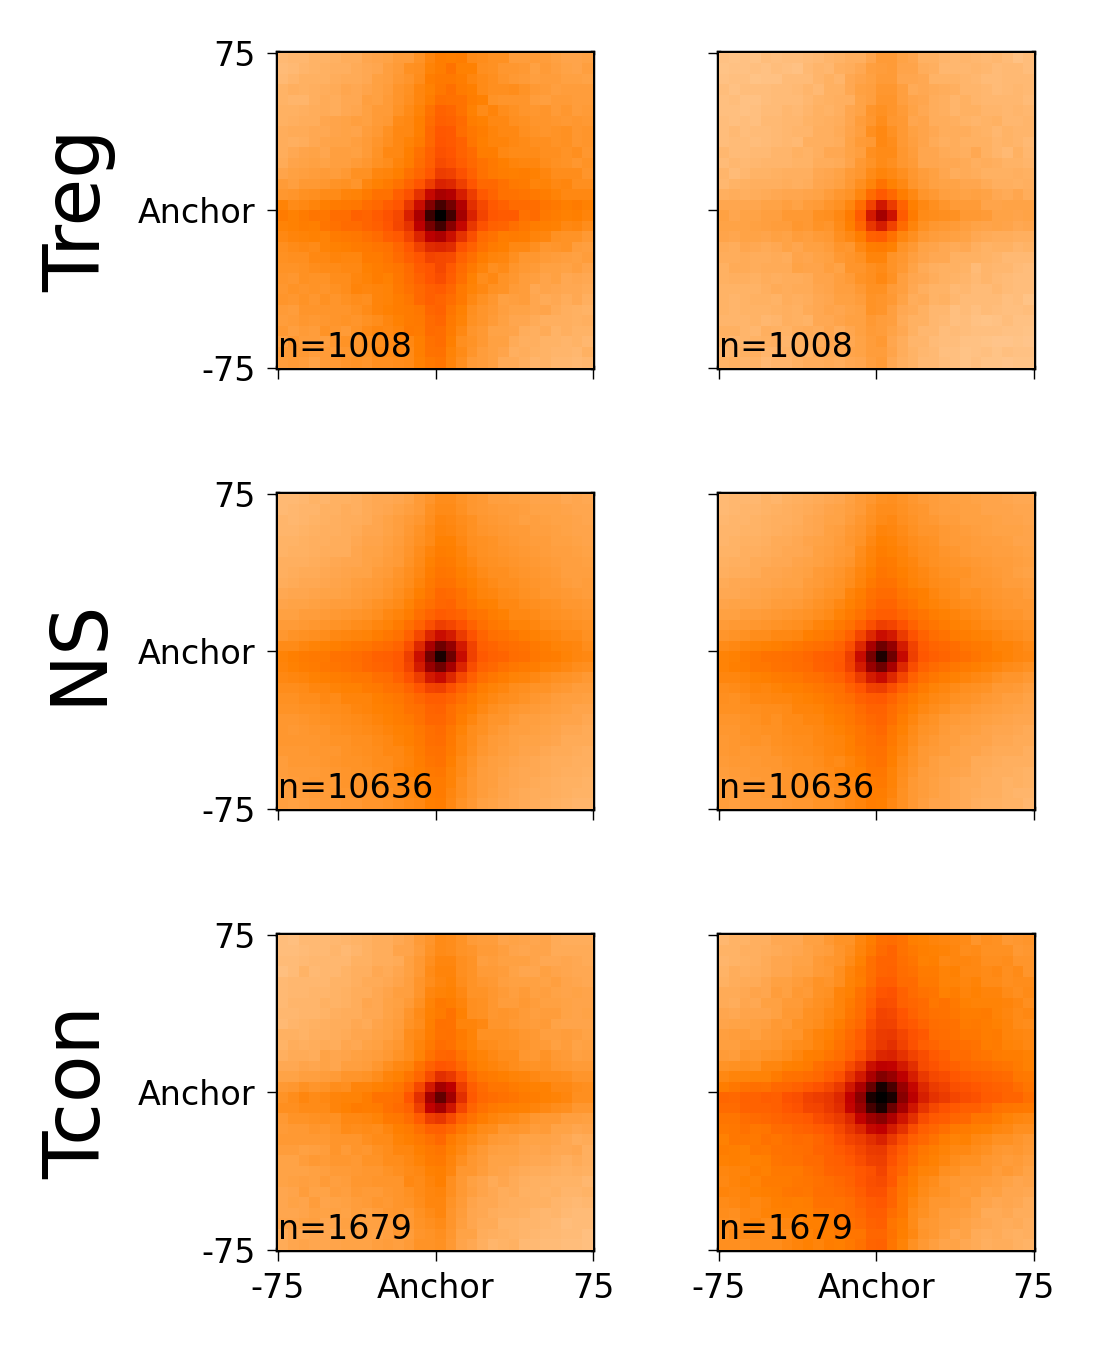

In [36]:
import scanpy as sc
from plotting_functions import *
from main_figures_plotting_functions import make_loop_adata_plot

make_loop_adata_plot(loop_adata, full_pileup_dict)

D. Corrrelation

In [ ]:
import pandas as pd
from init_tss_annotations import *

gene_dict = pickle.load(open('./annotations/rna_lfc_dict.p', 'rb'))


In [44]:
from main_figures_plotting_functions import anchor_to_lfc_and_loops

anchor_to_loop, anchor_to_lfcs, gene2anchor = anchor_to_lfc_and_loops(slop_tss)

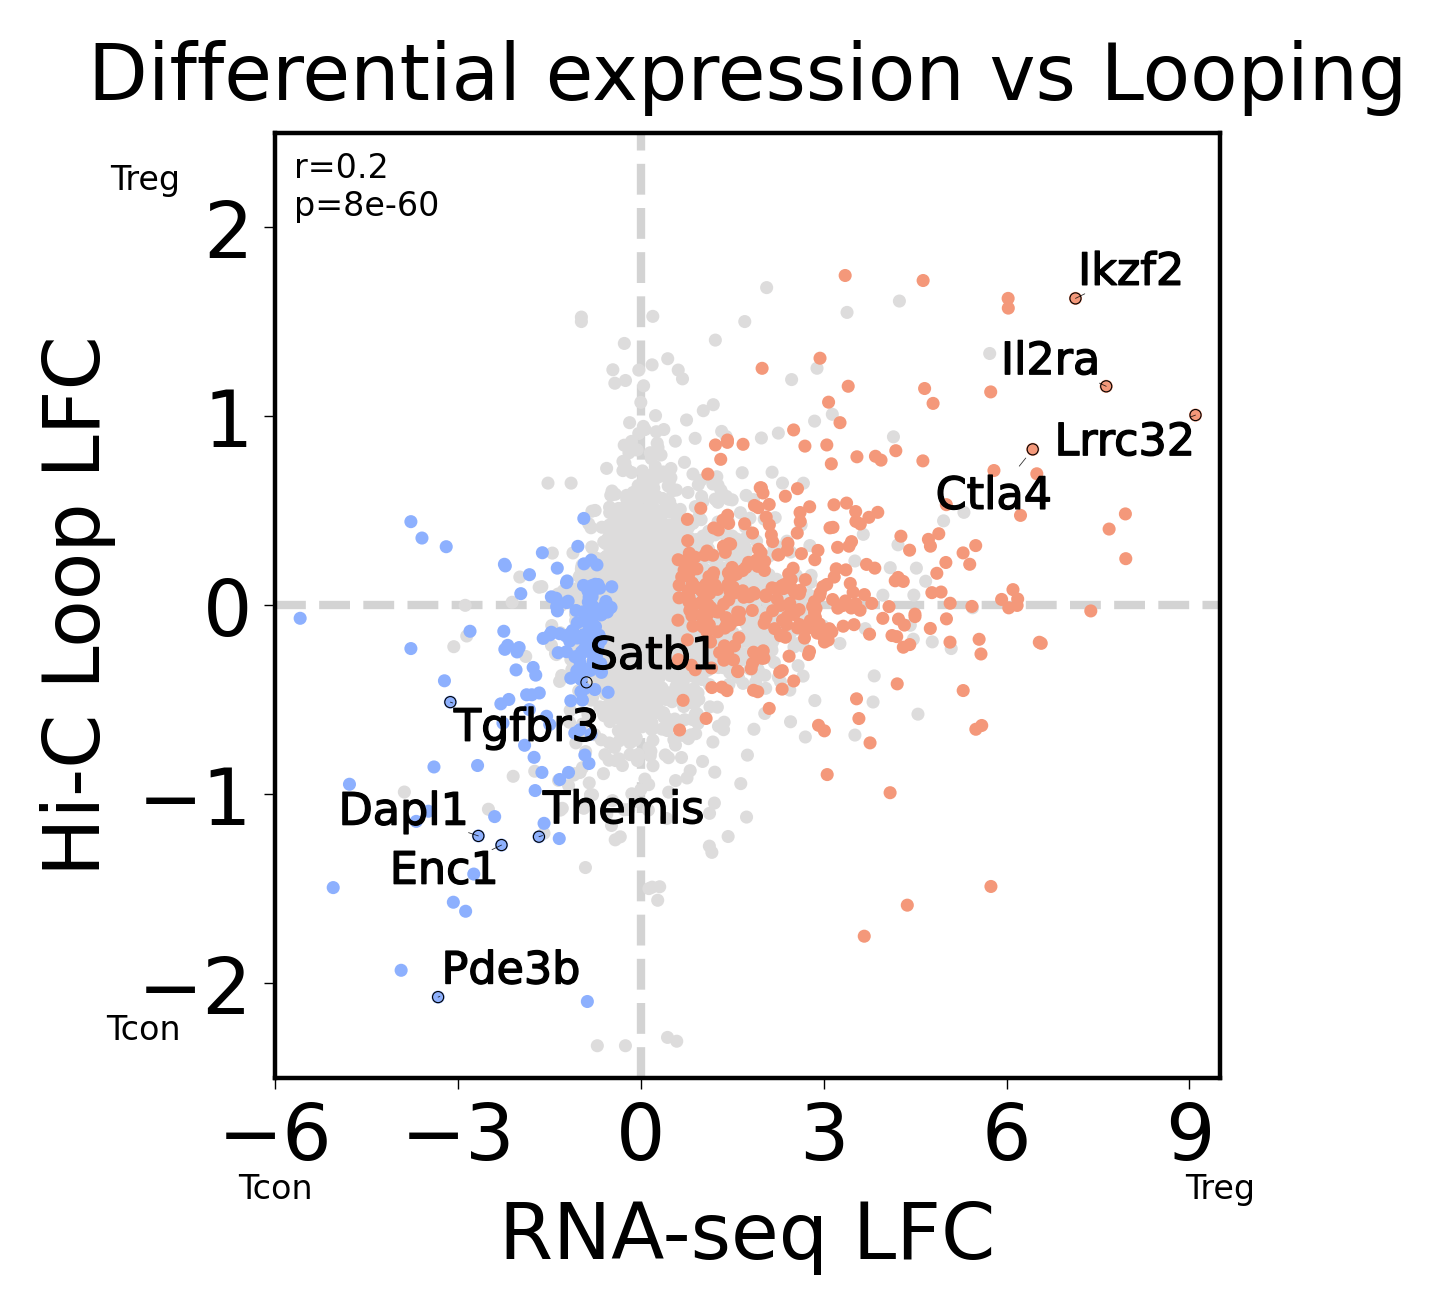

In [52]:
from main_figures_plotting_functions import gene_loop_scatter_plot

gene_loop_scatter_plot(gene_dict, anchor_to_lfcs, gene2anchor)

E. cABC analysis found in "cABC analysis"

F. cABC analysis found in "cABC analysis"

G. 

1


2024-08-27 11:26:13 - INFO - maxp pruned
2024-08-27 11:26:13 - INFO - cmap pruned
2024-08-27 11:26:13 - INFO - kern dropped
2024-08-27 11:26:13 - INFO - post pruned
2024-08-27 11:26:13 - INFO - FFTM dropped
2024-08-27 11:26:13 - INFO - GPOS pruned
2024-08-27 11:26:13 - INFO - GSUB pruned
2024-08-27 11:26:13 - INFO - glyf pruned
2024-08-27 11:26:13 - INFO - Added gid0 to subset
2024-08-27 11:26:13 - INFO - Added first four glyphs to subset
2024-08-27 11:26:13 - INFO - Closing glyph list over 'GSUB': 46 glyphs before
2024-08-27 11:26:13 - INFO - Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'H', 'I', 'M', 'S', 'T', 'W', 'a', 'b', 'c', 'comma', 'd', 'divide', 'e', 'eight', 'f', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'minus', 'n', 'nine', 'nonmarkingreturn', 'numbersign', 'o', 'one', 'p', 'parenleft', 'parenright', 'q', 'r', 's', 'space', 't', 'two', 'z', 'zero']
2024-08-27 11:26:13 - INFO - Glyph IDs:   [0, 1, 2, 3, 6, 11, 12, 15, 16, 19, 20, 21, 23, 24, 27, 28, 38, 39, 40,

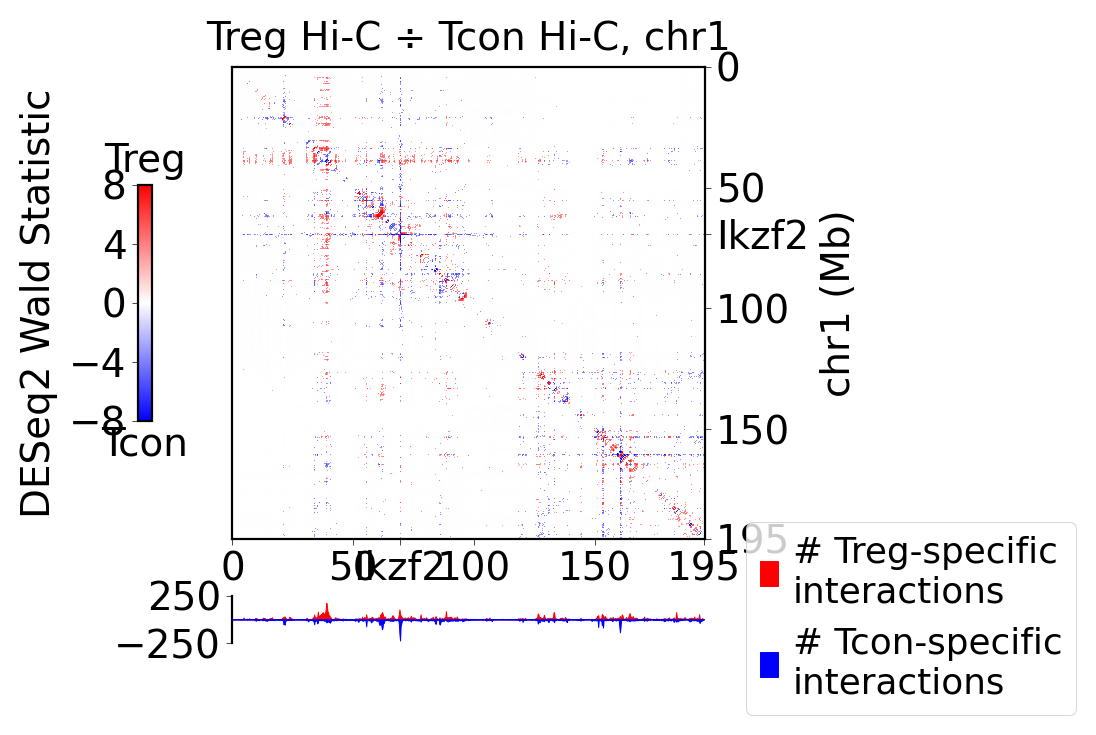

In [55]:
!mkdir -p plots/paper/fig1
from supp_figures_plotting_functions import make_chromosomewide_deseq_plot

label_list = [[278, 'Ikzf2']]
fig = make_chromosomewide_deseq_plot(deseq_effect_mat, deseq_pval_mat, '1', chrom_to_start, chrom_to_end, label_list, dpi = 100)
fig.savefig('./plots/paper/fig1/chr1.pdf', bbox_inches='tight', dpi = 100)

H.

/Genomics/pritykinlab/gabe/jupys/tregs/./code/main_figures_plotting_functions.py:146: RuntimeWarning: invalid value encountered in divide


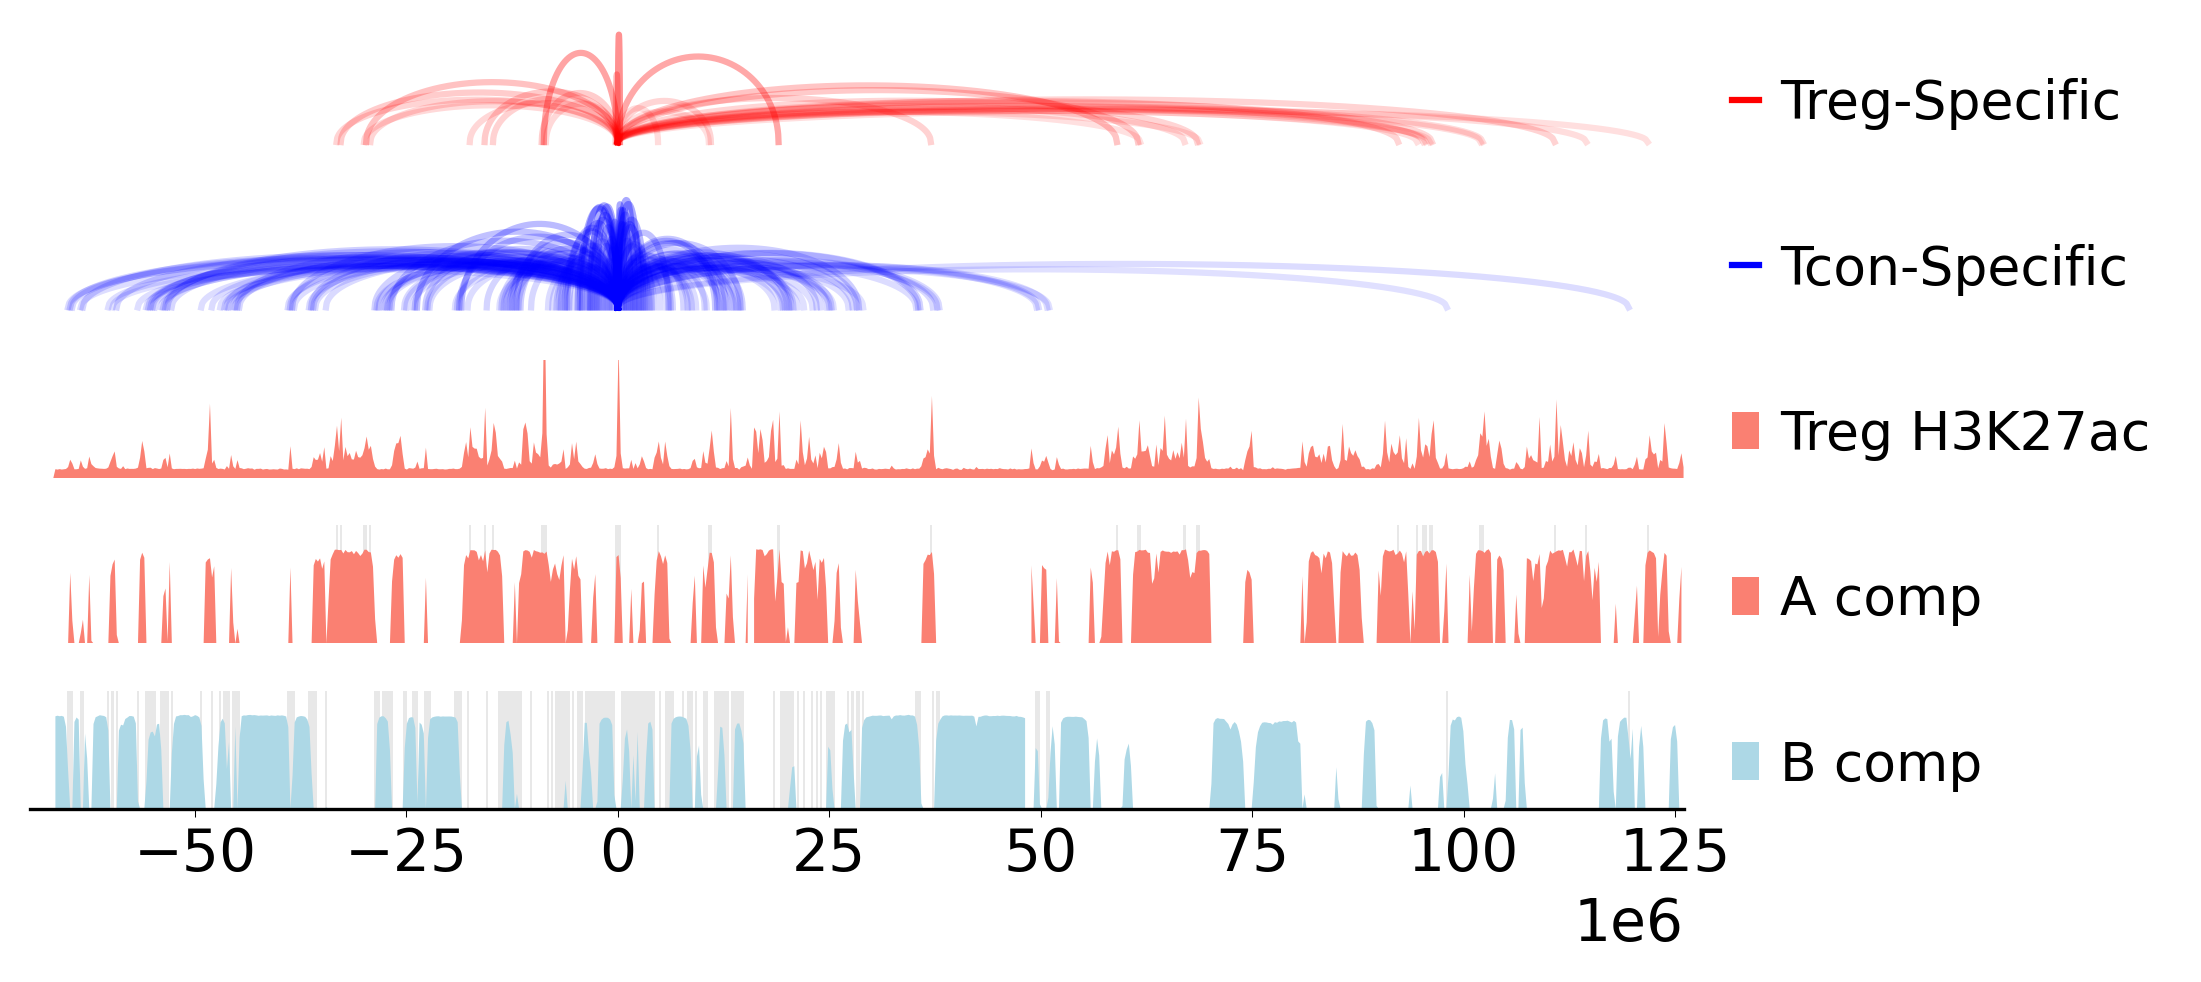

In [64]:
from main_figures_plotting_functions import ikzf2_arc_plot

ikzf2_arc_plot(deseq_effect_mat, bw_val_df_all_250kb.copy(), my_treg_comp)

I, J, K. Hi-C plots shown elsewhere

#### Figure 2

A. Schematic

B. Pileups shown in Pileup_Intra_Inter_Metadomains_By_Pvalue

C. Metaloop distance

In [66]:
!mkdir -p plots/paper/fig2

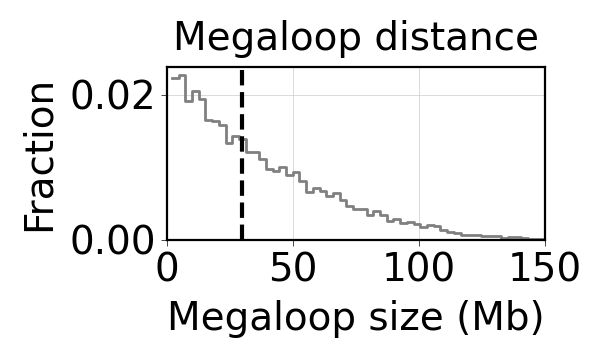

In [68]:
from main_figures_plotting_functions import metadomain_metadomain_size

metadomain_metadomain_size(all_intra_metadomains, dpi = 100)

D. Hi-C plots shown elsewhere

E. Metadomain triplets

In [ ]:
from main_figures_plotting_functions import plot_metaloop_network_enrichment

fig1, fig2 = plot_metaloop_network_enrichment(all_intra_treg_metadomains, CHROMS_TO_USE, 
                                 chrom_to_start, chrom_to_end, chrom_sizes, 
                                 cutoffs = [0])

fig1.savefig('./plots/FINAL_METADOMAINS/triplet_enrichment_1.pdf')
fig2.savefig('./plots/FINAL_METADOMAINS/triplet_enrichment_2.pdf')

F. Clustering

/Genomics/pritykinlab/gabe/jupys/tregs/./code/aux_functions.py:190: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = scipy.cluster.hierarchy.linkage(matrix, method=method, metric=metric)
/Genomics/pritykinlab/gabe/jupys/tregs/./code/aux_functions.py:193: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  ordering = scipy.cluster.hierarchy.optimal_leaf_ordering(linkage, matrix)


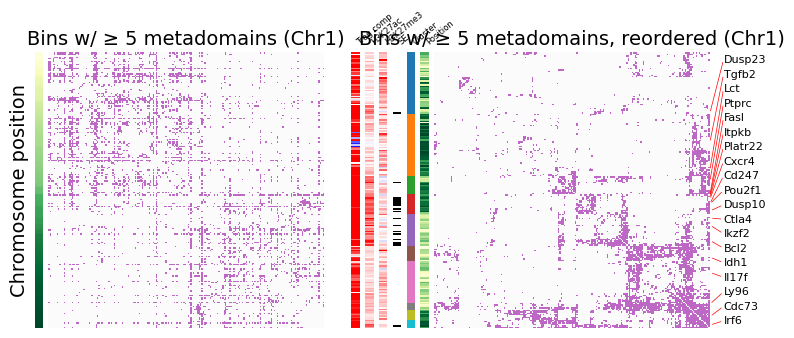

In [78]:
from supp_figures_plotting_functions import generate_chromosome_heatmap

generate_chromosome_heatmap('1', all_intra_metadomains, gene_to_ind, SE_count, bw_val_df_all_250kb.copy(), 
                            my_treg_comp, chrom_to_start, chrom_to_end, cutoff=5, dpi=50);

G. Hi-C plots shown elsewhere

H. 

Comparison of 0 and 1
p-value: 6.1579880436781885e-46
stat: -14.227810365487956
Comparison of 0 and 2
p-value: 2.2243892154912543e-12
stat: -7.019641073822404


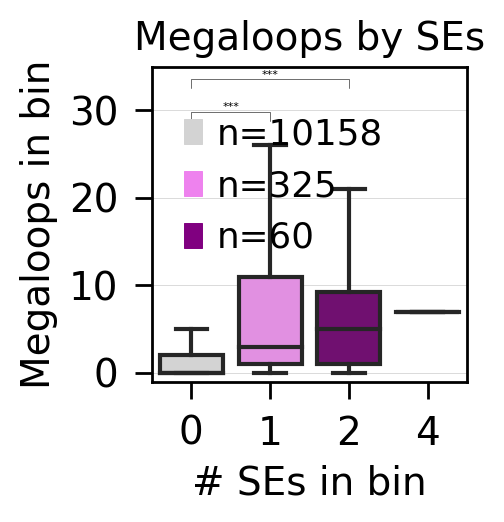

In [95]:
from plot_pvals import add_stat_annotation_boxplot_no_hue
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
from main_figures_plotting_functions import make_metadomain_plot

fig = make_metadomain_plot(all_intra_treg_metadomains, SE_count)
fig.savefig('./plots/paper/fig2/se_higher_metadomains.pdf', bbox_inches='tight', dpi=300)

I. Hi-C plot shown elsewhere

J. Hi-C plot shown elsewhere

#### Figure 3.

A. Circos plot

In [ ]:
from main_figures_plotting_functions import interchrom_circos_plot
interchrom_circos_plot(my_treg_comp, my_tcon_comp, all_inter_metadomains, all_ind_to_region, 
                       chrom_to_start, chrom_to_end, chromsizes, bw_val_df_all_250kb.copy(),
                           parsed_chroms)

B. Pileup shown elsewhere

C. 

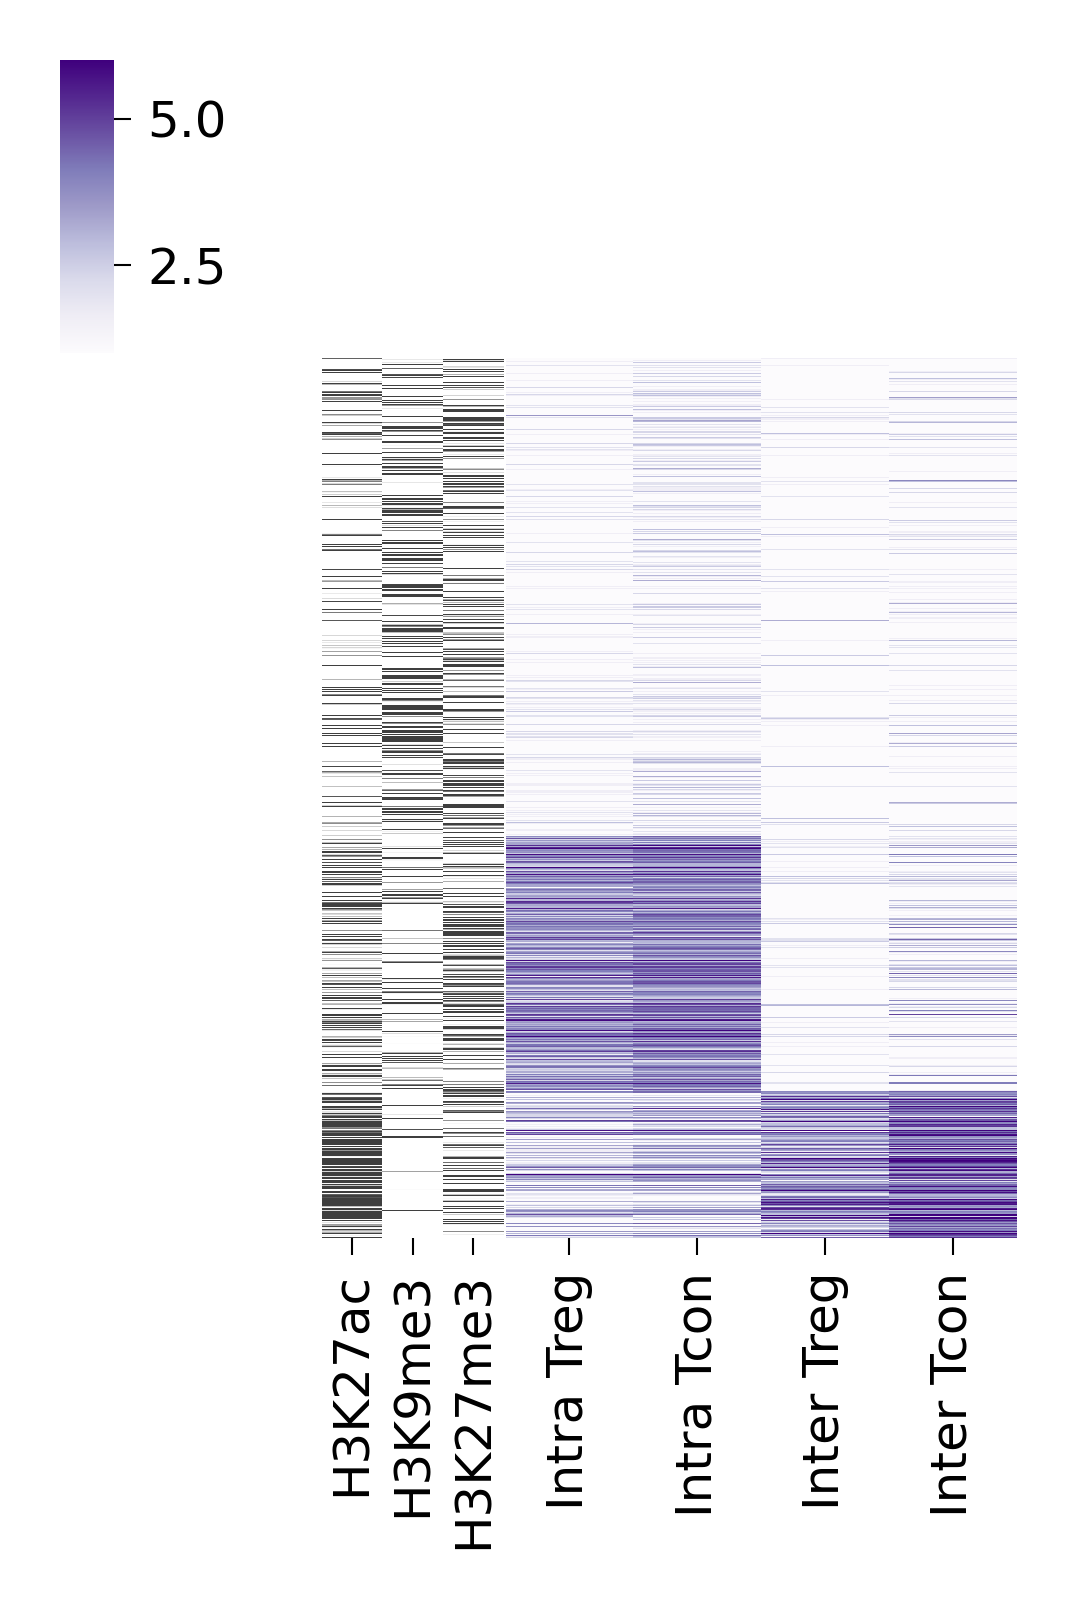

In [118]:
from main_figures_plotting_functions import intra_inter_metadomain_clustering
intra_inter_metadomain_clustering(all_intra_treg_metadomains, all_inter_treg_metadomains, all_intra_tcon_metadomains, all_inter_tcon_metadomains, bw_val_df_all_250kb)

D. Schematic composed from plots below

In [120]:
superenhancer_dict = {
    'common_SE' :  remove_chr_bedtool(pbt.BedTool('superenhancers/common_SE_liftover.bed')), 
    'Tn_SE' :  remove_chr_bedtool(pbt.BedTool('superenhancers/Tn_SE_liftover.bed')), 
    'Treg_SE' :  remove_chr_bedtool(pbt.BedTool('superenhancers/Treg_SE_liftover.bed')), 
}

In [125]:
bw_pref = '/Genomics/argo/users/gdolsten/pritlab/snakemake_sras/bws/'
bbi_path_dict = {
    'Tconv Relap65' : bw_pref + 'GSM.DRR277322.904C1_Relap65ChIP_Tconv_periphery_WT_stimulated_rep1.fastq.bw', 'Treg Relap65' : bw_pref + 'GSM.DRR277324.904R1_Relap65ChIP_Treg_periphery_WT_stimulated_rep1.fastq.bw', 'Treg Ets1' : bw_pref + 'GSM.SRR5385288.Ets1_ChIP-seq_of_Treg.bw', 'Tconv Ets1' : bw_pref + 'GSM.SRR5385289.Ets1_ChIP-seq_of_Tconv.bw', 'Treg CREB' : bw_pref + 'GSM.SRR5385282.CREB_ChIP-seq_of_Treg.bw', 'Tconv CREB' : bw_pref + 'GSM.SRR5385283.CREB_ChIP-seq_of_Tconv.bw', 'Tconv Satb1' : bw_pref + 'GSM.SRR5385263.Satb1_ChIP-seq_of_peripheral_Tconv.bw', 'Treg Satb1' : bw_pref + 'GSM.SRR5385295.Satb1_ChIP-seq_of_Treg.bw', 'Treg Stat5' : bw_pref + 'GSM.DRR277305.901R1_Stat5ChIP_Treg_periphery_WT_rep1.fastq.bw', 'Tcon Stat5' : bw_pref + 'GSM.DRR277303.901C1_Stat5ChIP_Tconv_periphery_WT_rep1.fastq.bw', 'Treg H3K4me3' : bw_pref + 'GSM.SRR5385311.H3K4me3_ChIP-seq_of_Treg.bw', 'Tcon H3K4me3' : bw_pref + 'GSM.SRR5385312.H3K4me3_ChIP-seq_of_Tconv.bw', 'Treg H3K4me1' : bw_pref + 'GSM.SRR5385327.H3K4me1_ChIP-seq_of_Treg.bw', 'Tcon H3K4me1' : bw_pref + 'GSM.SRR5385328.H3K4me1_ChIP-seq_of_Tconv.bw', 'Treg H3K27ac' : bw_pref + 'GSM.SRR5385344.H3K27ac_ChIP-seq_of_Treg_replicate_2.bw', 'Tcon H3K27ac' : bw_pref + 'GSM.SRR5385346.H3K27ac_ChIP-seq_of_Tconv_replicate_2.bw', 'CD4SP H3K27ac' : bw_pref + 'GSM.SRR5385352.H3K27ac_ChIP-seq_of_immature_CD4SP_replicate_2.bw', 'Prec. H3K27ac' : bw_pref + 'GSM.SRR5385350.H3K27ac_ChIP-seq_of_tTreg_precursor_replicate_2.bw', 'tTreg H3K27ac' : bw_pref + 'GSM.SRR5385348.H3K27ac_ChIP-seq_of_tTreg_replicate_2.bw', 'Treg H3K27me3' : bw_pref + 'GSM.SRR5385317.H3K27me3_ChIP-seq_of_Treg.bw', 'Tcon H3K27me3' : bw_pref + 'GSM.SRR5385318.H3K27me3_ChIP-seq_of_Tconv.bw', 'Treg CTCF' : bw_pref + 'JesseYe.NA.Treg_CTCF_ChIP.bw', 'CD4 CTCF' : bw_pref + 'JesseYe.NA.CD4_Tcell_CTCF_ChIP.bw', 'Treg Smc1a' : bw_pref + 'GSM.SRR5385276.Smc1a_ChIP-seq_of_Treg.bw', 'Tcon Smc1a' : bw_pref + 'GSM.SRR5385277.Smc1a_ChIP-seq_of_Tconv.bw', 'CD4 H3K9me3' : bw_pref + 'GSM2827228.SRR6197767._H3K9me3_WT__Mus_musculus__ChIP-Seq.bw', 'Tcon Tet2' : bw_pref + 'GSM.DRR277318.903C1_Tet2ChIP_Tconv_periphery_WT_rep1.fastq.bw', 'Treg Tet2' : bw_pref + 'GSM.DRR277320.903R1_Tet2ChIP_Treg_periphery_WT_rep1.fastq.bw', 'Treg Med1' : bw_pref + 'GSM.SRR5385279.Med1_ChIP-seq_of_Treg.bw', 'Tcon Med1' : bw_pref + 'GSM.SRR5385280.Med1_ChIP-seq_of_Tconv.bw', 'Treg Runx1' : bw_pref + 'GSM.SRR5385291.Runx1_ChIP-seq_of_Treg.bw', 'Tcon Runx1' : bw_pref + 'GSM.SRR5385292.Runx1_ChIP-seq_of_Tconv.bw', 'Treg Bcl11b' : bw_pref + 'GSM.SRR5385285.Bcl11b_ChIP-seq_of_Treg.bw', 'Tcon Bcl11b' : bw_pref + 'GSM.SRR5385286.Bcl11b_ChIP-seq_of_Tconv.bw', 'Treg Ep300' : bw_pref + 'GSM.DRR277316.902R1_Ep300ChIP_Treg_periphery_WT_rep1.fastq.bw', 'Tcon Ep300' : bw_pref + 'GSM.DRR277314.902C1_Ep300ChIP_Tconv_periphery_WT_rep1.fastq.bw', 'Treg Foxp3' : bw_pref + 'GSM.SRR5385294.Foxp3_ChIP-seq_of_Treg.bw',
}

HIIO: random state:  2
N_clusts: 24
23
3
dict_keys(['Treg H3K27me3', 'Treg Stat5', 'Treg H3K4me1', 'Treg H3K4me3', 'Treg H3K27ac'])
N_clusts: 19


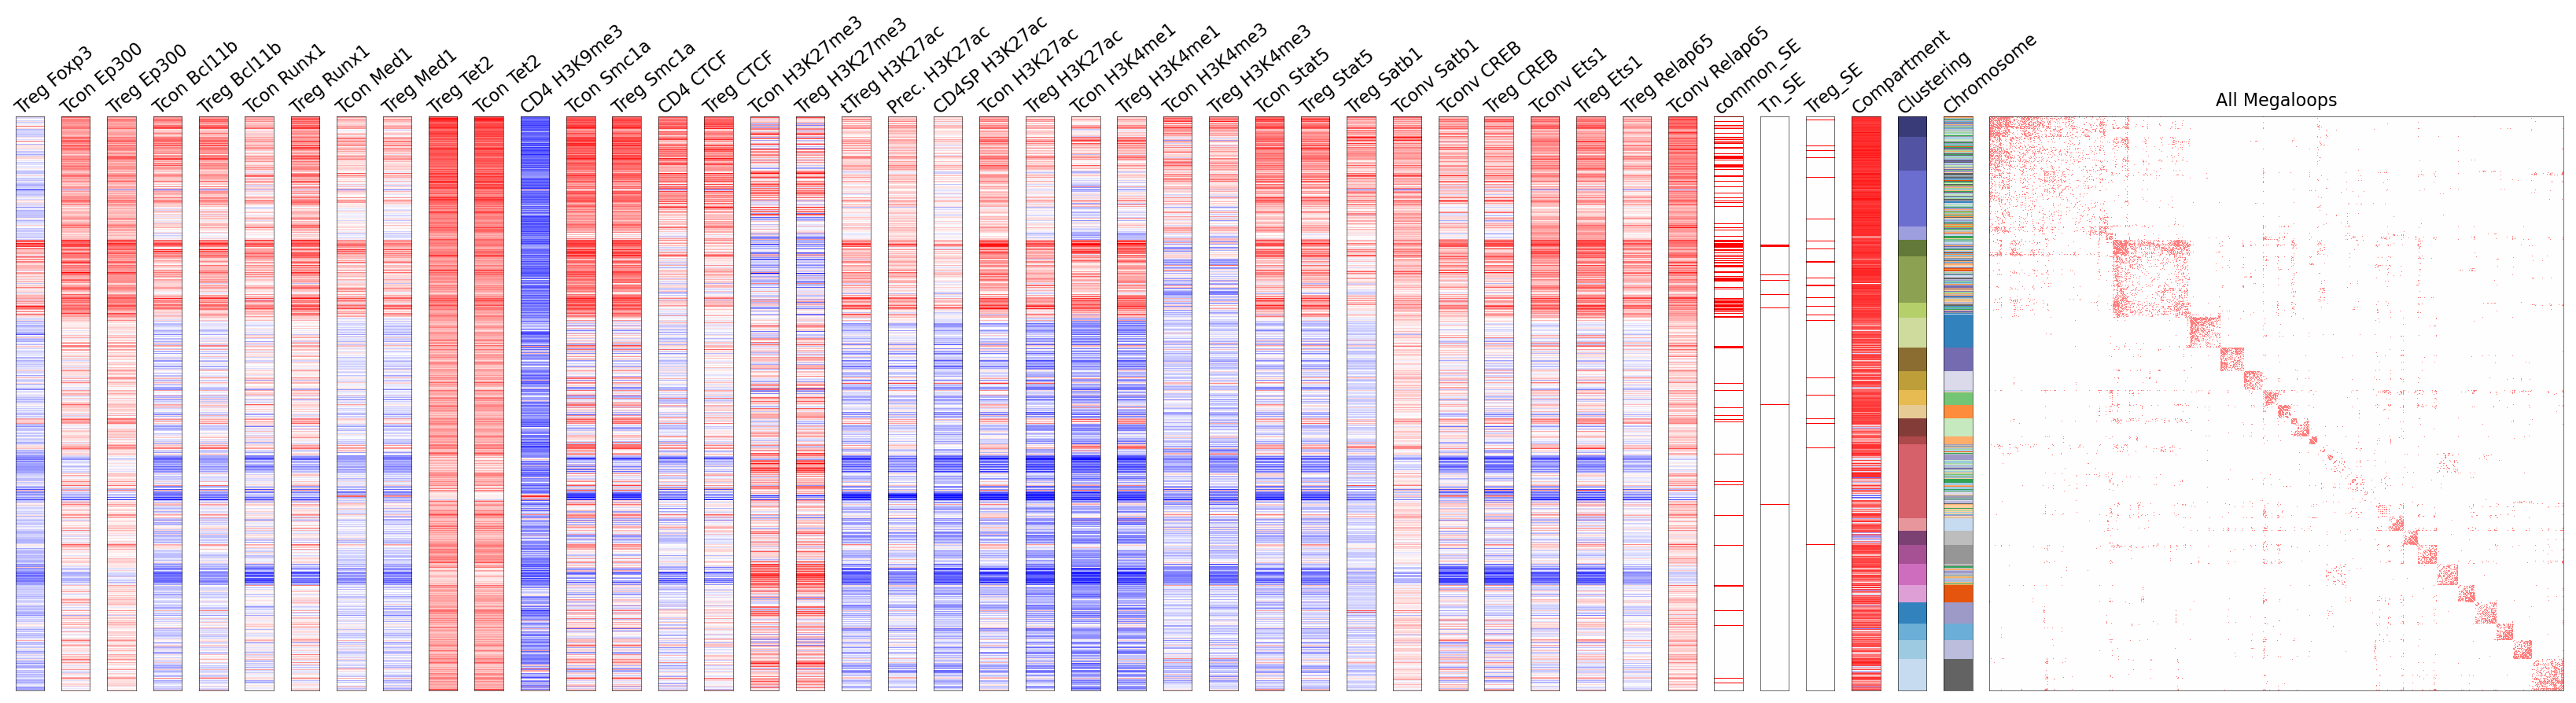

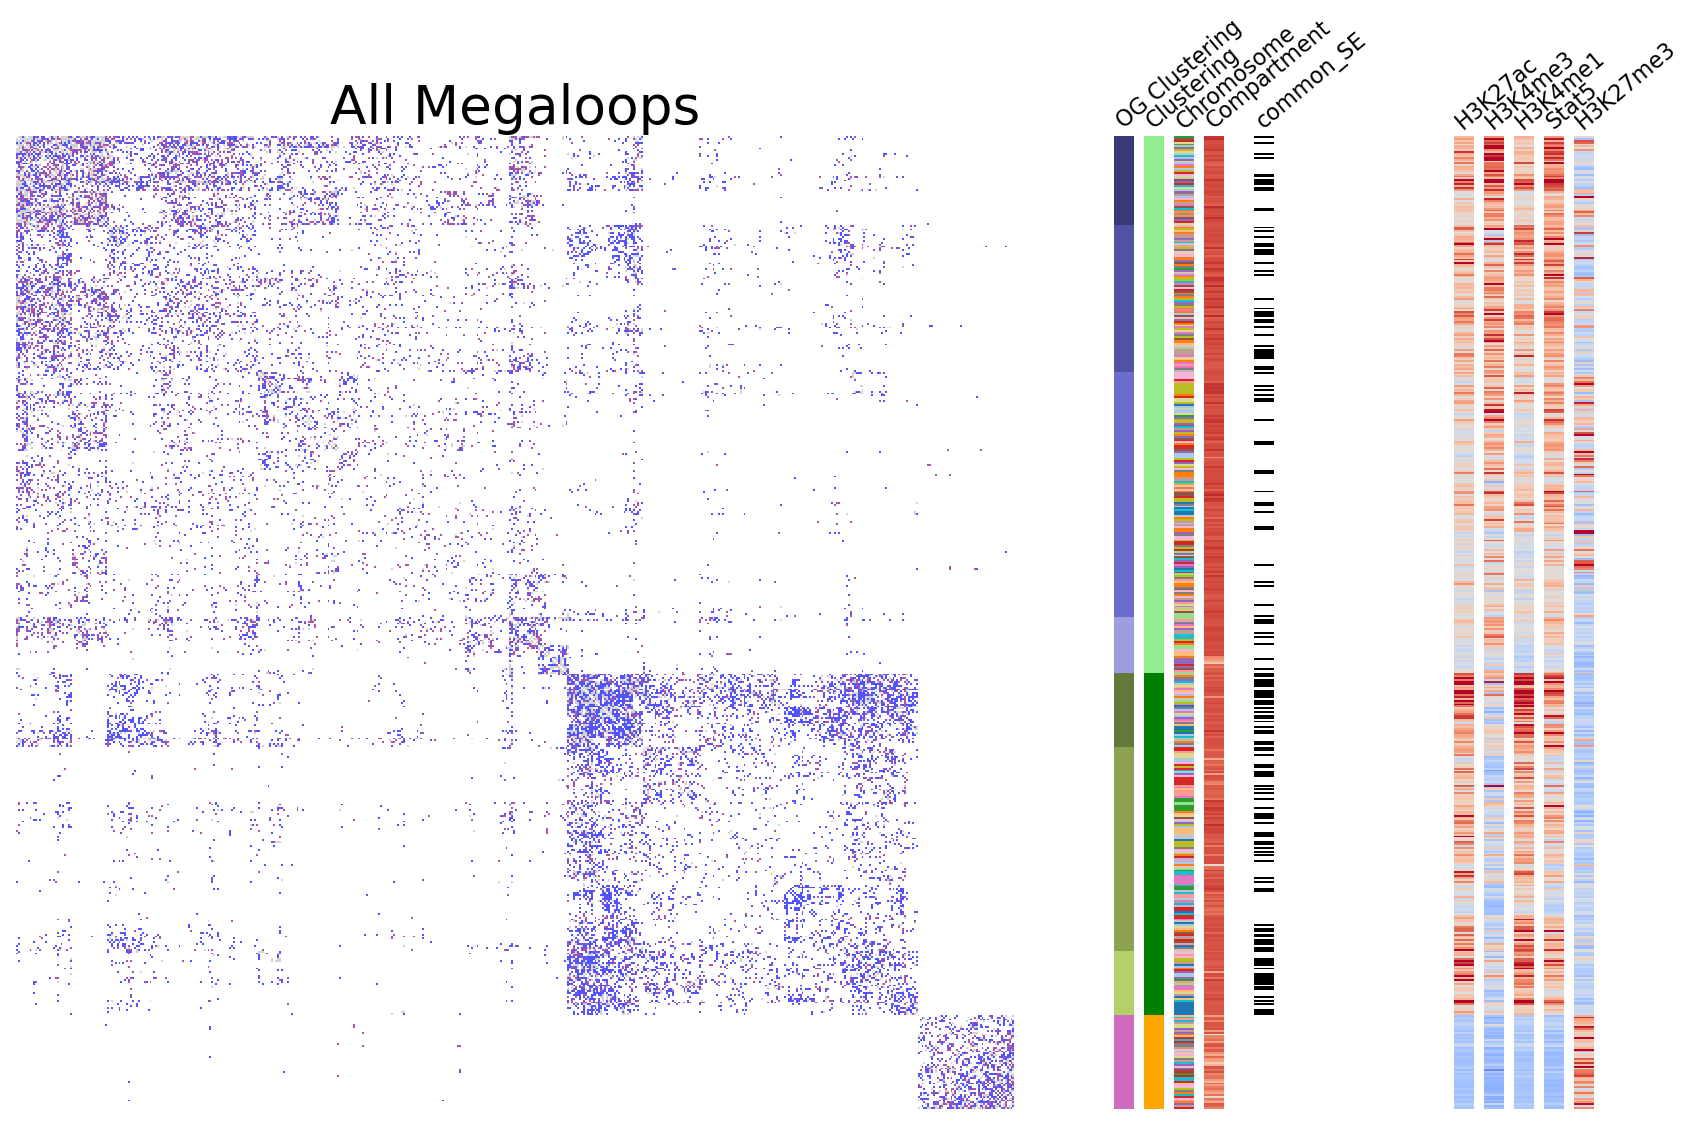

In [126]:
from inter_intra_metadomain_object import *

self = MetadomainDataset(all_intra_metadomains, all_inter_metadomains, all_ind_to_region, 
    					parsed_chroms, superenhancer_dict, bbi_path_dict, ind_to_gene, my_treg_comp,
                        inter_and_intra_metadomains_treg, inter_and_intra_metadomains_tcon,
                        n_initial_clusters = 24
                      )

/Genomics/pritykinlab/gabe/jupys/tregs/./code/main_figures_plotting_functions.py:649: RuntimeWarning: invalid value encountered in divide


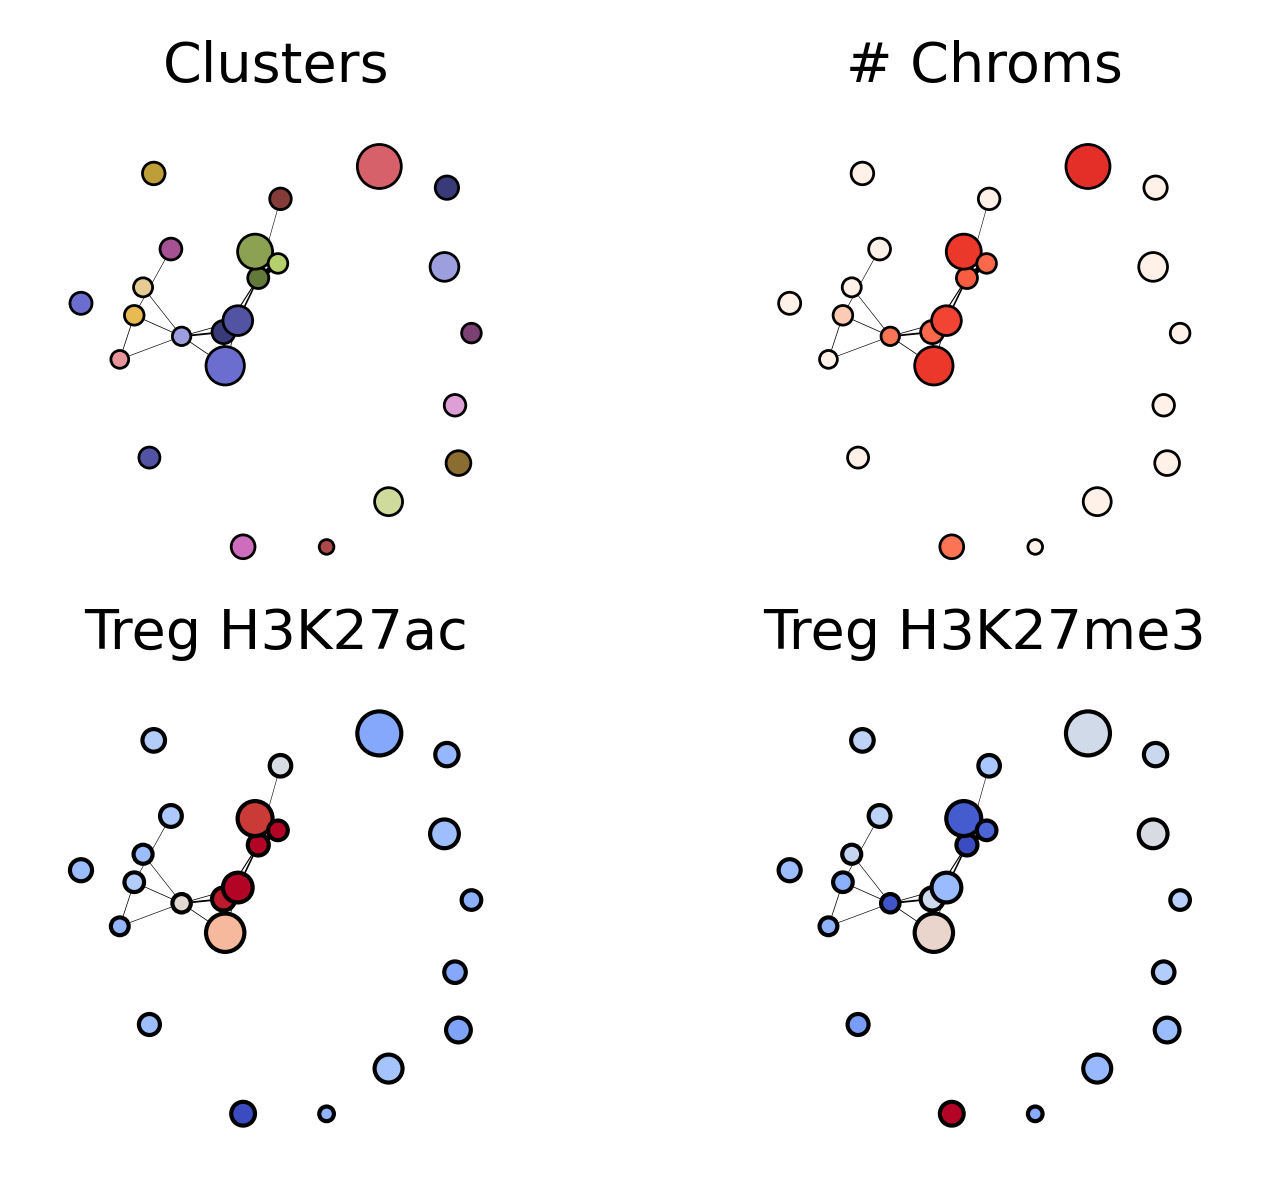

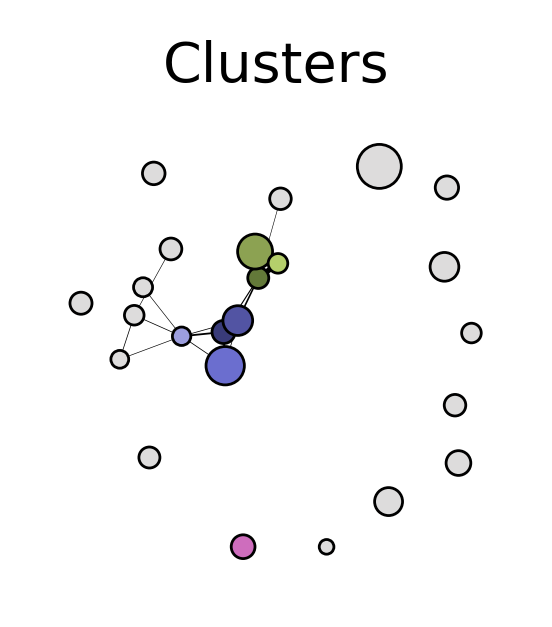

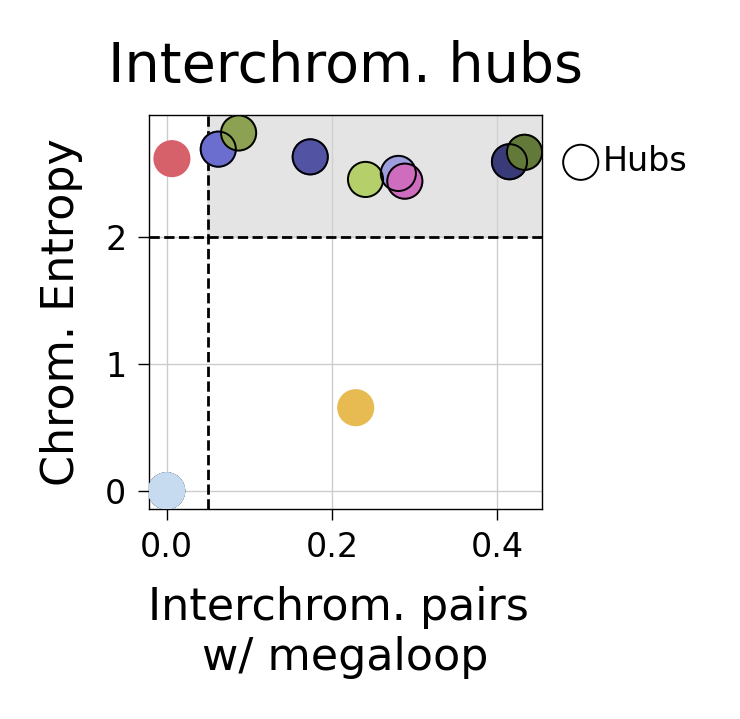

In [145]:
from main_figures_plotting_functions import make_networkx_plots

make_networkx_plots(self, all_inter_metadomains)

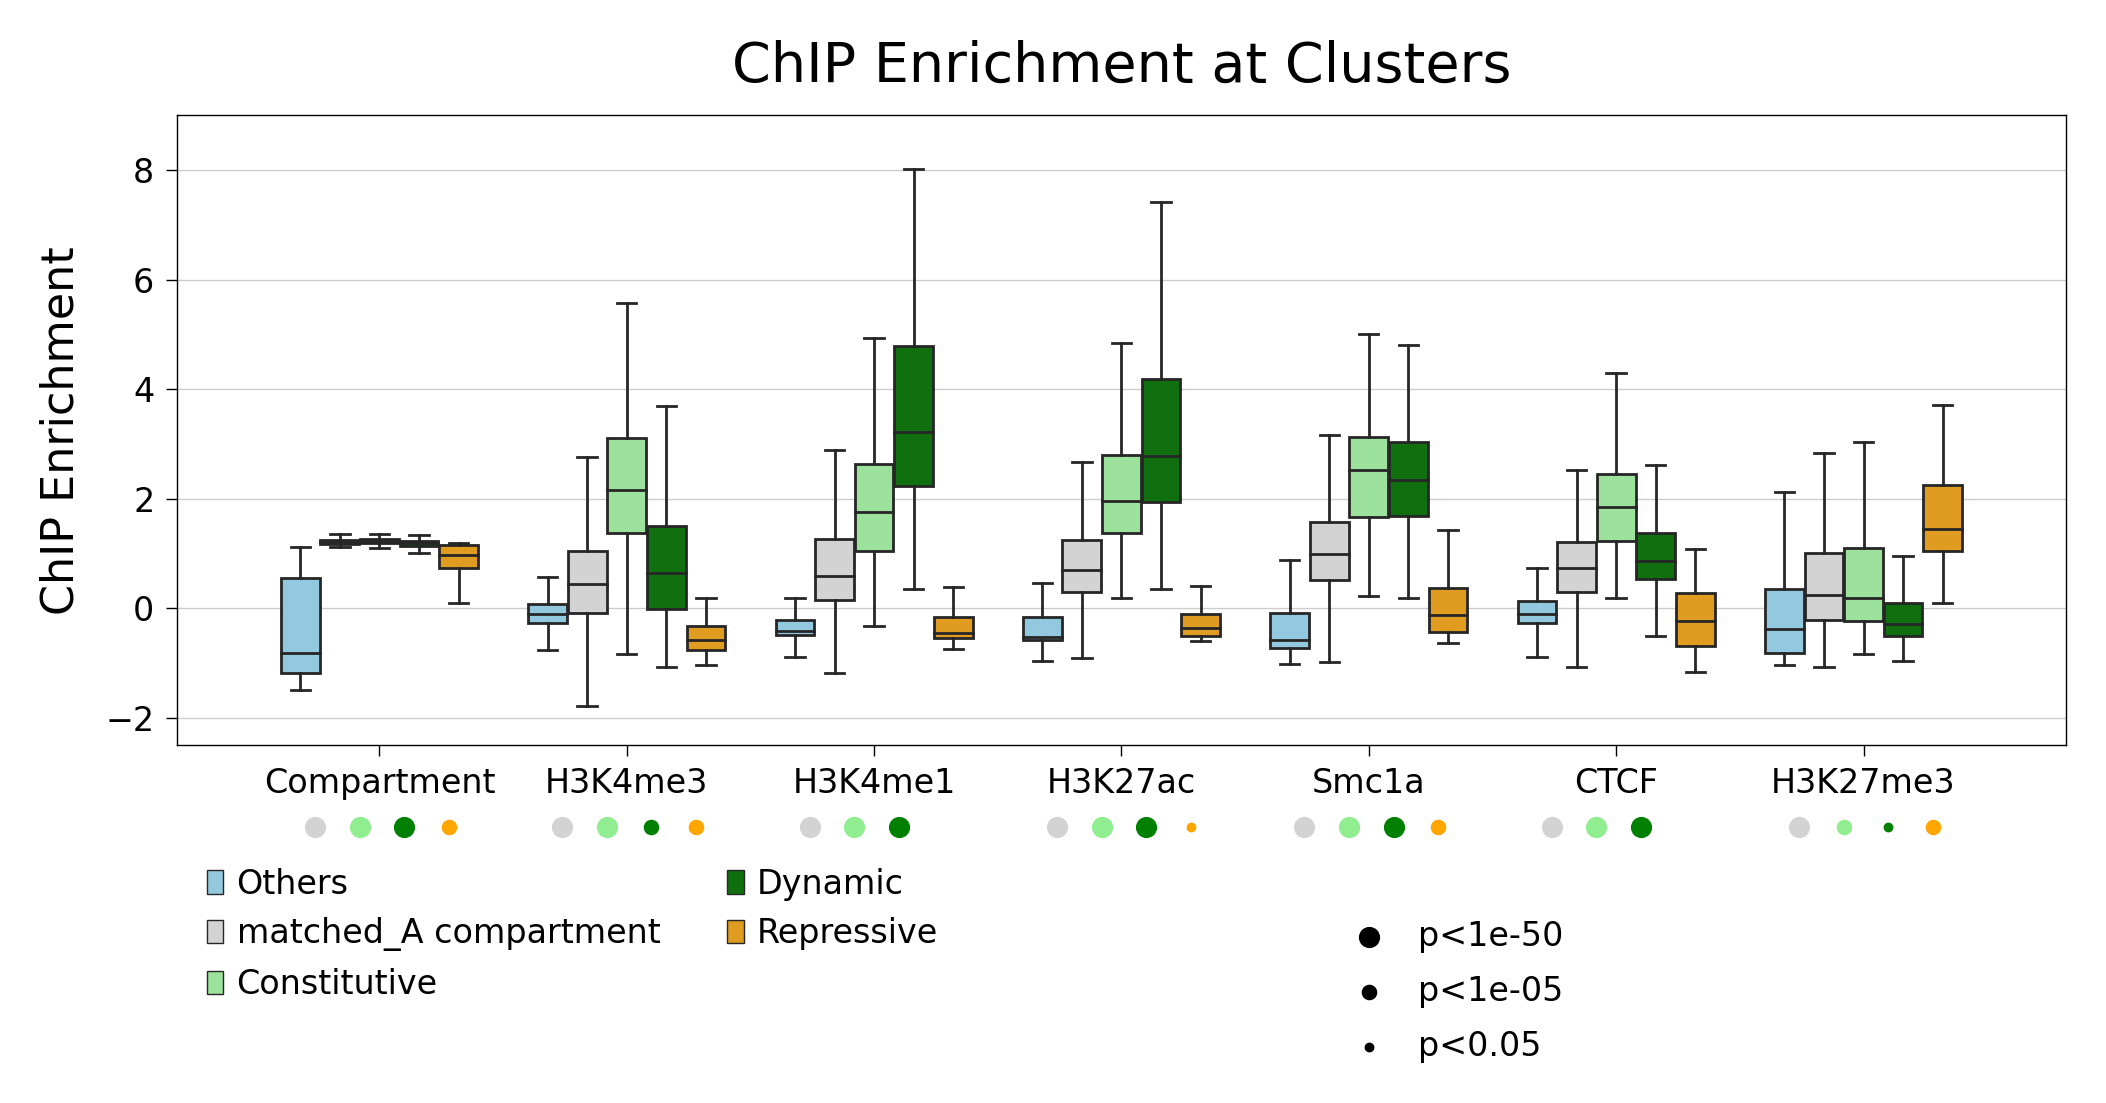

In [200]:
%autoreload 2
from main_figures_plotting_functions import chip_boxplot

chip_boxplot(_250kb_hub_annotations, bw_val_df_all_250kb, keysoi, my_treg_comp, row_colors, row_colors_dict)

H.

1
Constitutive - Dynamic 0.00013664187471323493


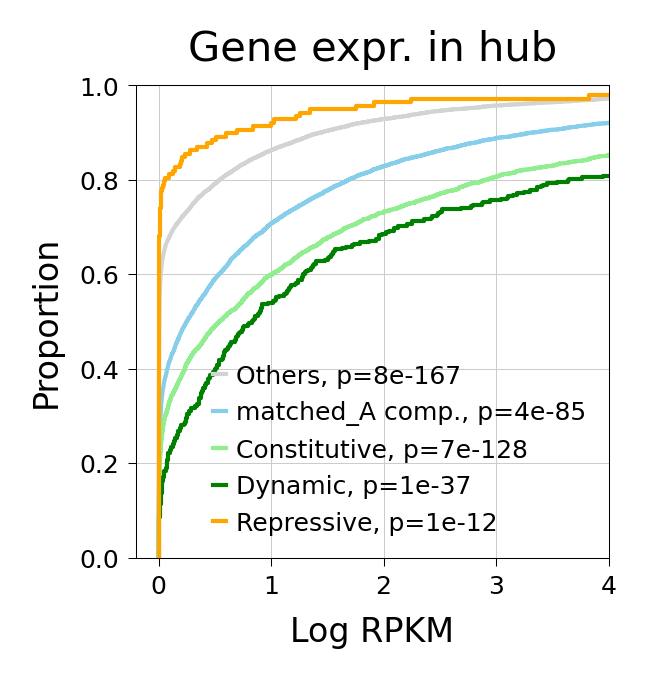

In [559]:
from main_figures_plotting_functions import rpkm_per_hub2

fig = rpkm_per_hub2(row_colors_dict, 'rTreg')
fig.savefig('./plots/paper/fig3/rpkm_per_hub.pdf', bbox_inches='tight')

I.

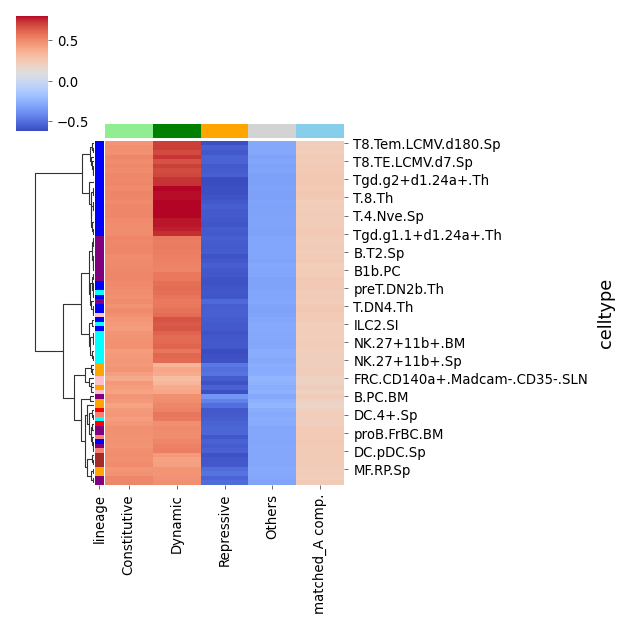

In [582]:
from main_figures_plotting_functions import make_immgen_datasets, aggregate_immgen_by_cluster, plot_aggregate_immgen_data

all_genelengths = pd.read_csv(rna_pref + 'SRP272473.SRR12264697.resting_Tcon.rep3.mapq30.counts.txt', sep='\t', skiprows=1)
immgen_gene_expression, geneLengths, immgen_metadata = make_immgen_datasets(all_genelengths.set_index('Geneid')['Length'], 
                                                                            all_tss_df, cluster_key='hub')
immgen_aggregate_data = aggregate_immgen_by_cluster(immgen_gene_expression, immgen_metadata, 
                                                     group_lineages=True, cluster_key='cluster')
plot_aggregate_immgen_data(immgen_aggregate_data, immgen_gene_expression, row_colors_dict, cluster_key='cluster')

J. Cusanovich

In [ ]:
from supp_figures_plotting_functions import cusanovich_atac_clustering

fig = cusanovich_atac_clustering(self, _250kb_hub_annotations)
fig.savefig('./plots/paper/s20/cusanovich_atac.pdf', bbox_inches = 'tight')

#### Figure 4

A. Schematic

B. Pileup shown in Pileup_Treg_Tcon_hubs

C. Pileup shown in Pileup_Human_Hub Pileup

D. Pileup shown in Pileup_Sakaguchi

E. Quantification shown in Pileup_Sakaguchi

F. Analysis shown in Pileup_SE Recovery

G. Schematic

H. Pileup shown in Pileup_Golnaz Ets1

I. Analysis shown in Pileup_Golnaz Ets1

#### Figure 5

A. Pileups shown in Pileup_Differential_Metadomain Score

B. 

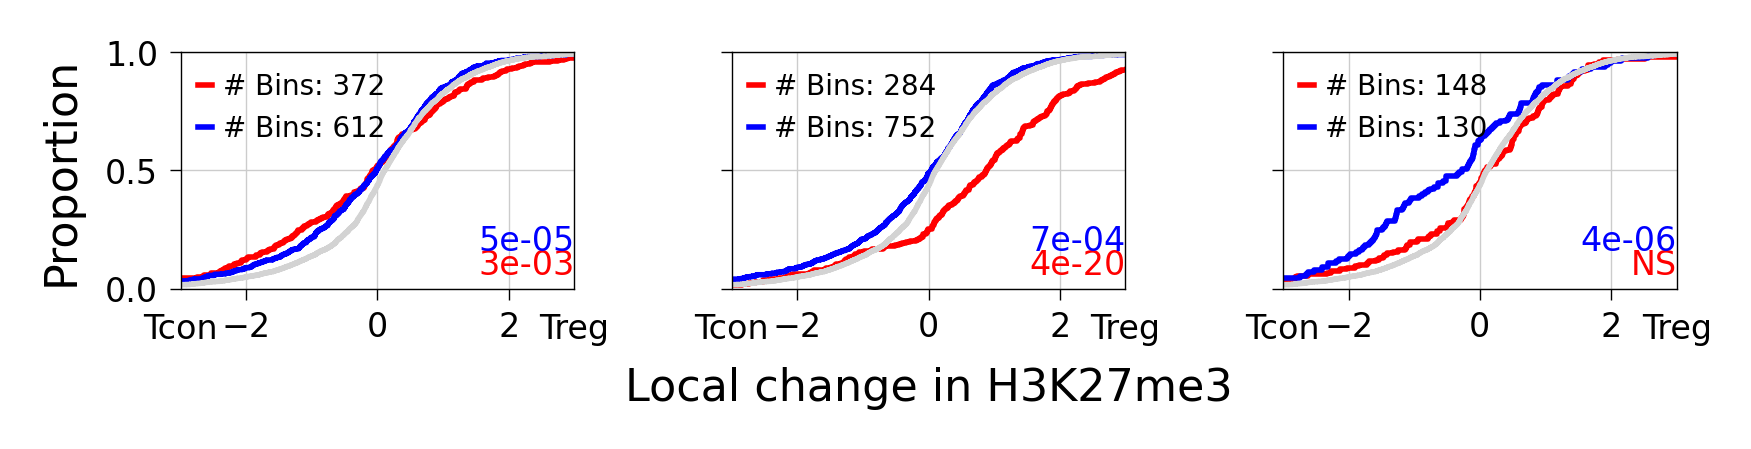

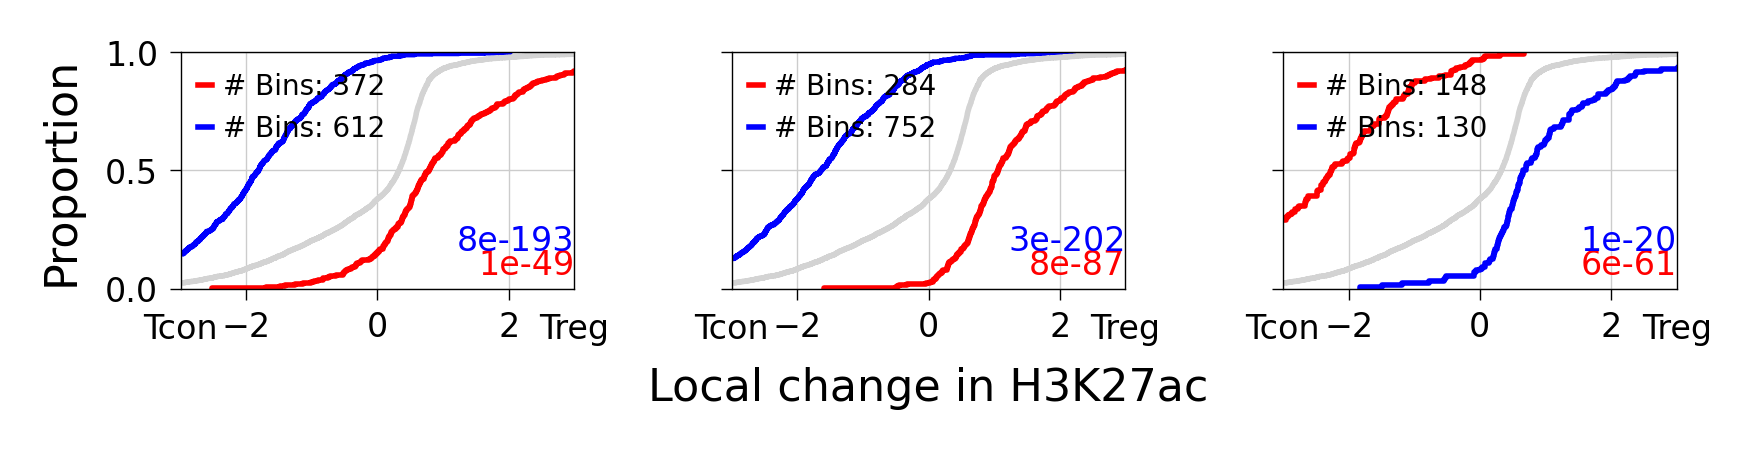

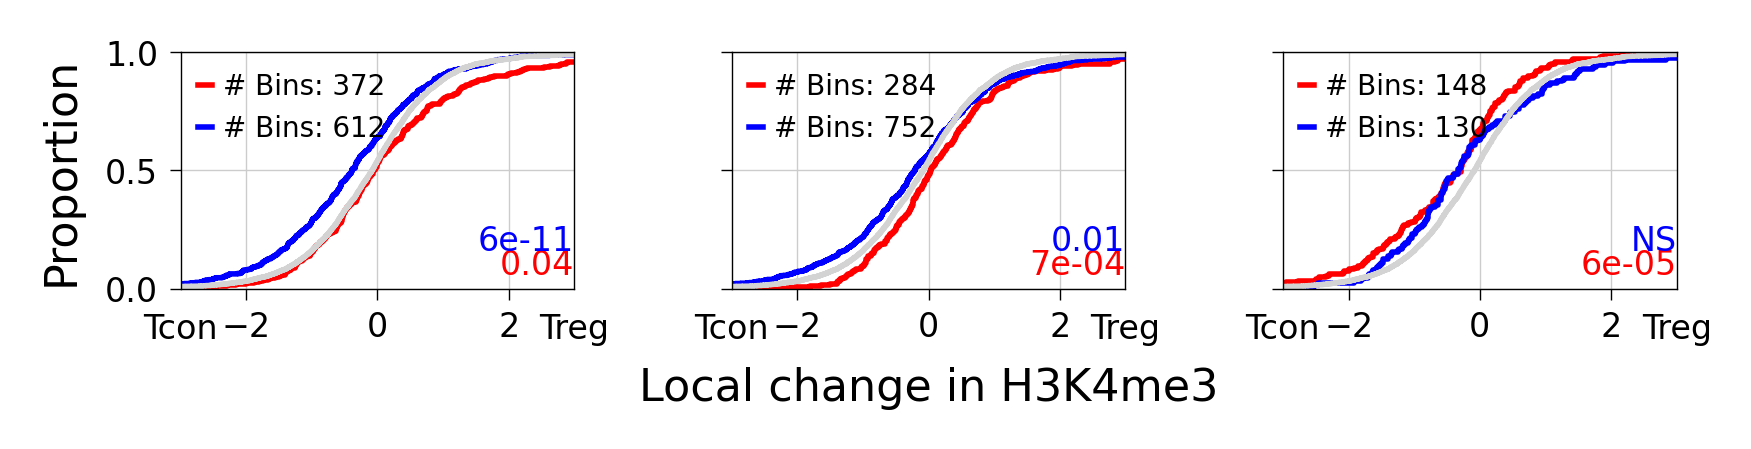

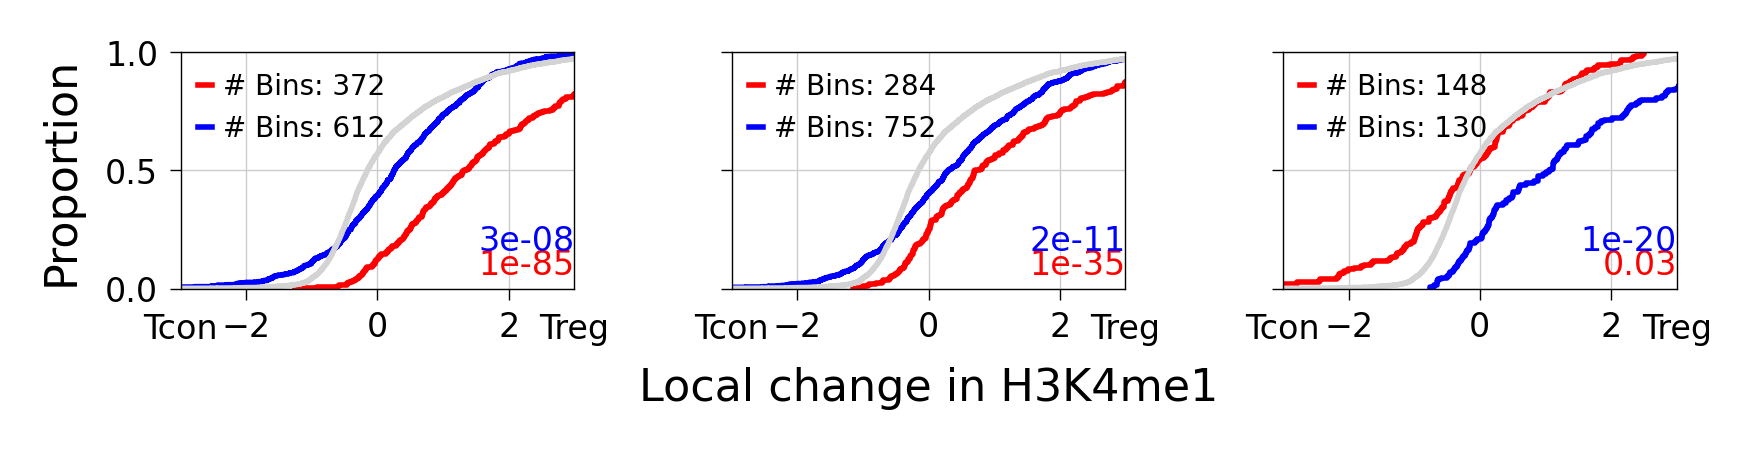

In [828]:
from main_figures_plotting_functions import make_differential_chip_plot

make_differential_chip_plot(hub_pileup_pval_df_250kb, hub_pileup_stat_df_250kb, bw_val_df_all_250kb)

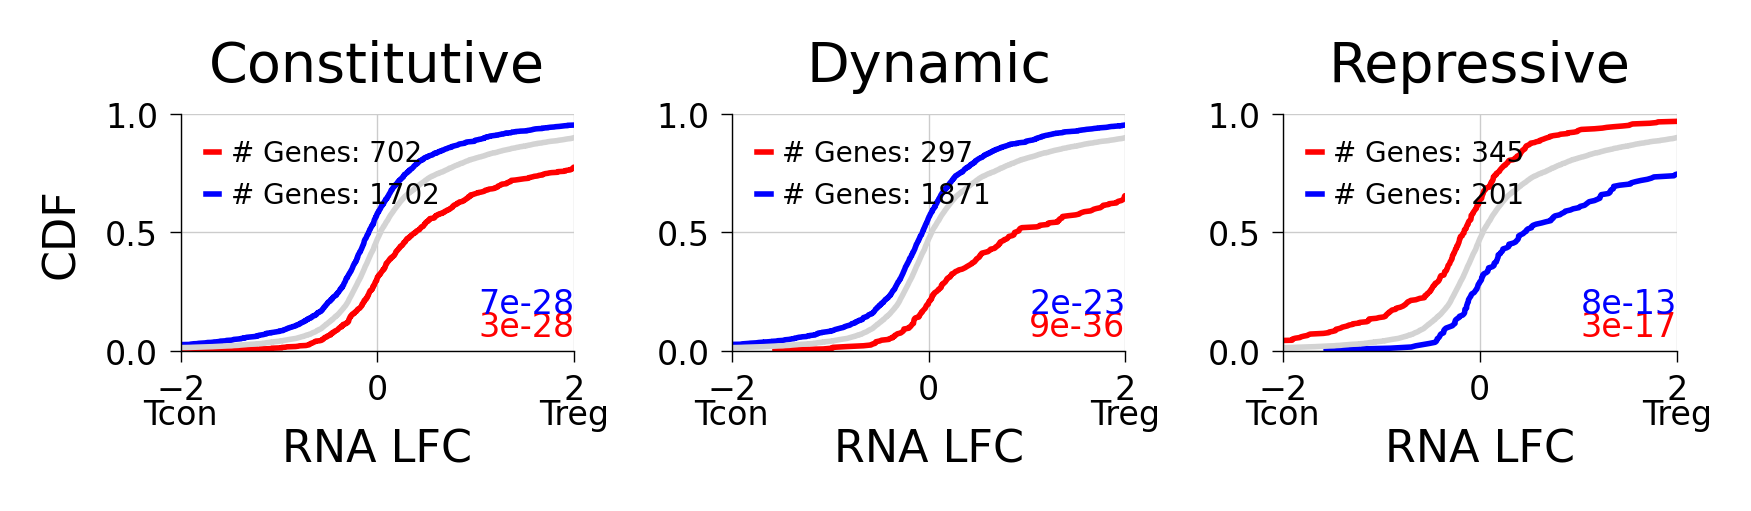

In [829]:
from main_figures_plotting_functions import make_differential_rna_plot

make_differential_rna_plot(pval_df, stat_df, gene_dict, ind_to_gene, columns_to_names)

C. 

In [832]:
!mkdir coaccessibility_analysis
!cp /Genomics/pritykinlab/susie/from_gabe/* coaccessibility_analysis/

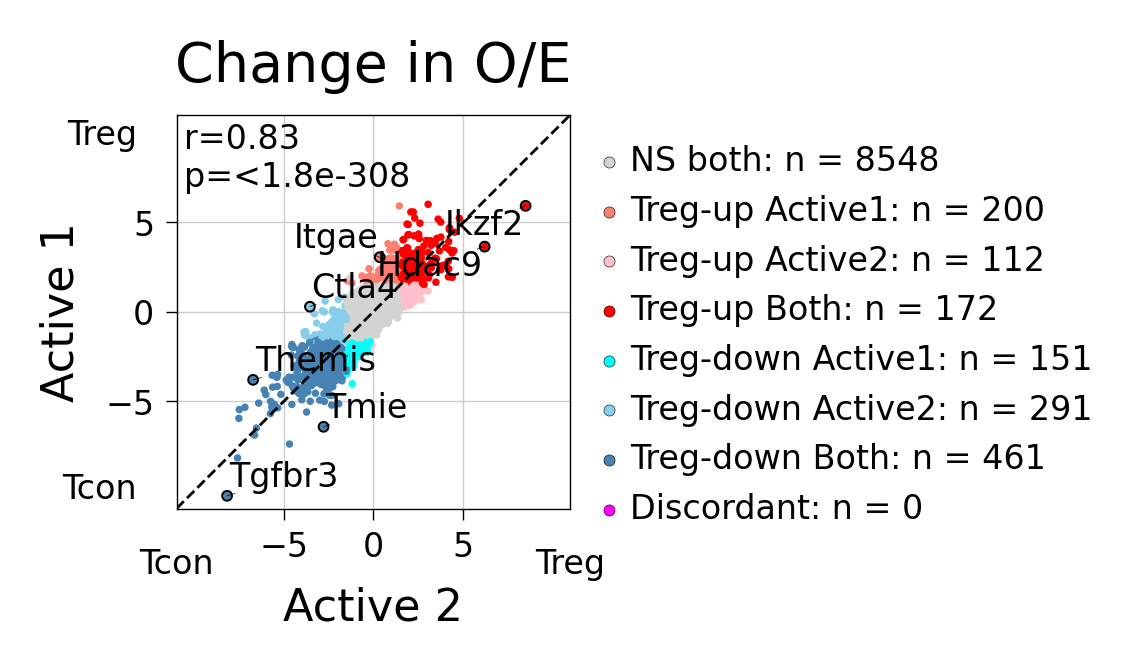

In [667]:
from main_figures_plotting_functions import plot_metadomain_score_fc_fc_plot

plot_metadomain_score_fc_fc_plot(pval_df, stat_df, ind_to_gene)

D. Pileup plotted in Pileup_Differential_Megaloop_Score

E. 

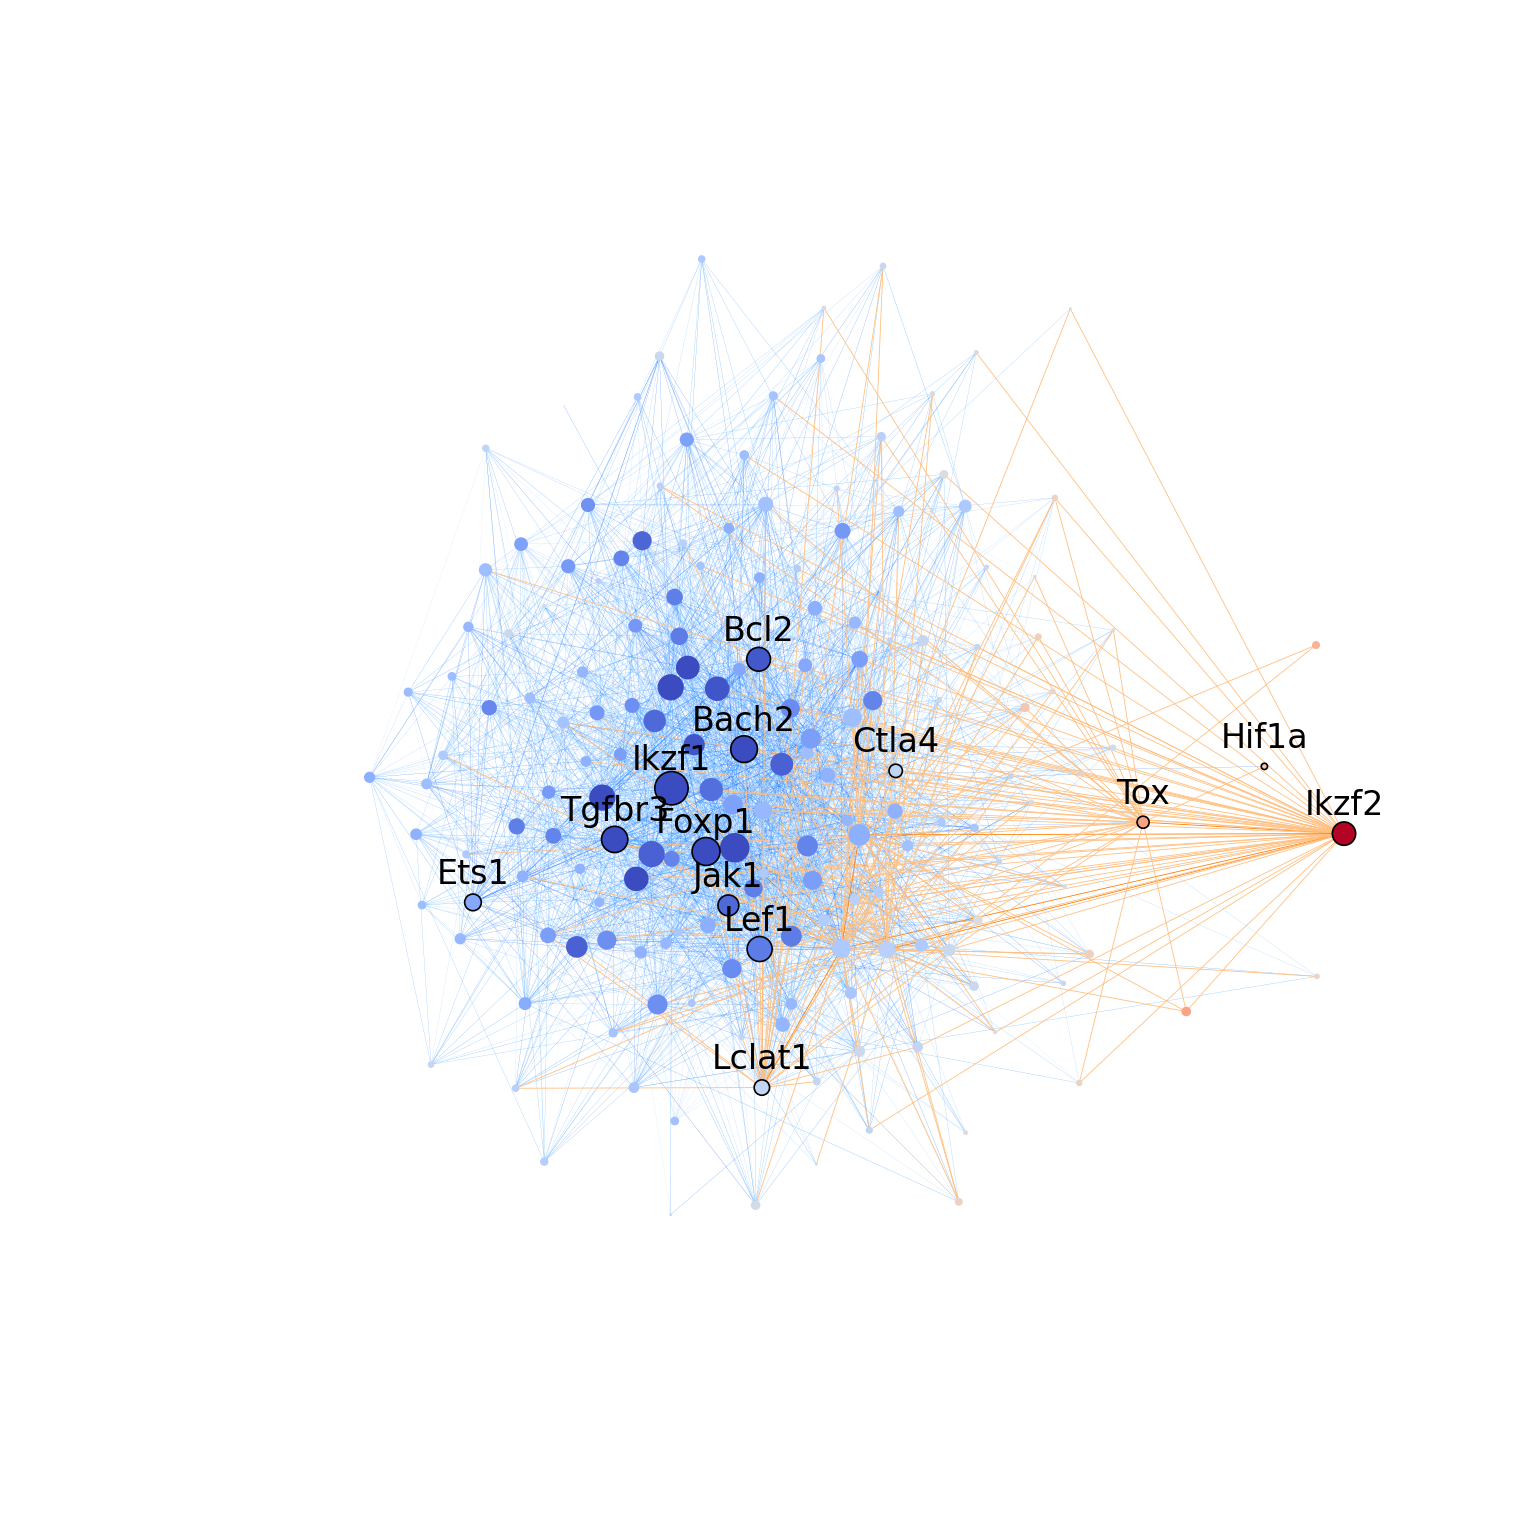

In [682]:
from main_figures_plotting_functions import networkx_cluster2_embedding

networkx_cluster2_embedding(self, goodinds, ind_to_gene)

F. Schematic

G. Pileup plotted in Pileup_Active_resting

H. Quantification plotted in Pileup_Active_resting

#### Figure 6

A-B. Schematic

G. Shown in "refine metaloops" notebook under "hic compendium"

E-F. Schematic

G. Shown in "refine metaloops" notebook under "hic compendium"

H. scATAC co-accessibility

In [ ]:
!mkdir -p plots/paper/fig6

RanksumsResult(statistic=4.819512021831944, pvalue=1.4390978160174762e-06)
RanksumsResult(statistic=12.423446941378144, pvalue=1.9497613945763276e-35)


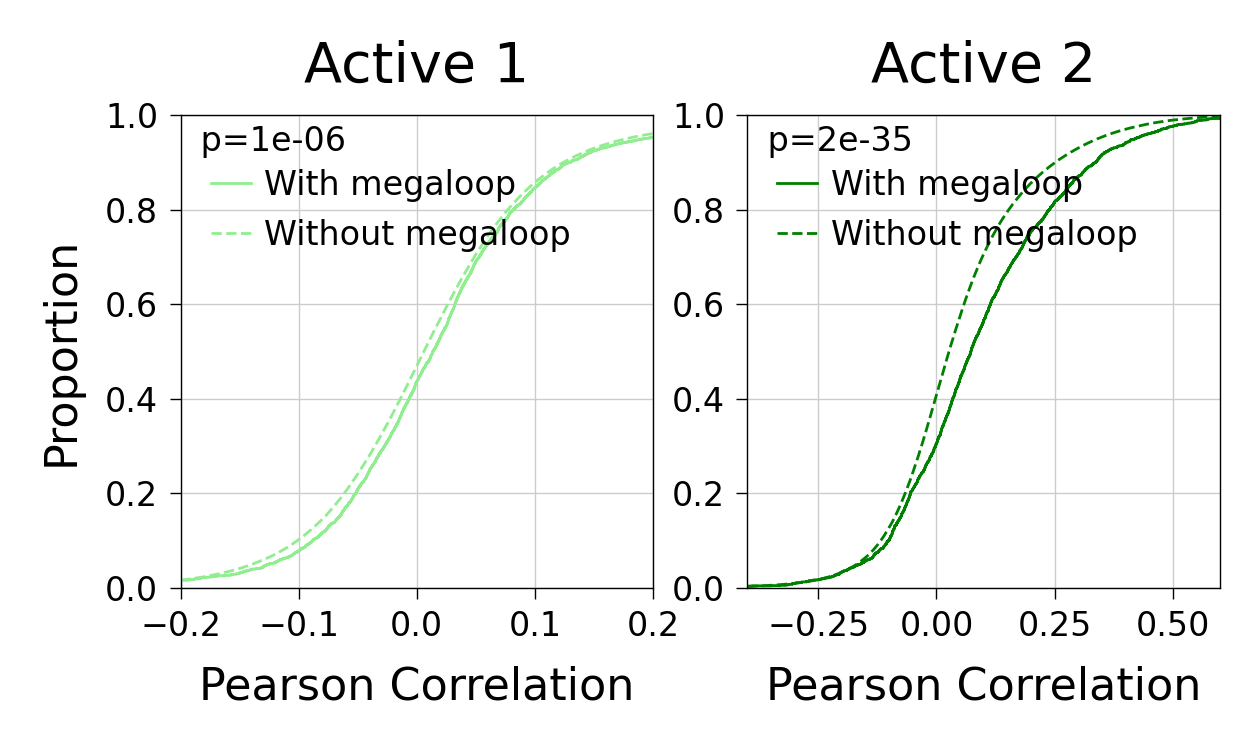

In [697]:
hub_atac_coaccessibility()

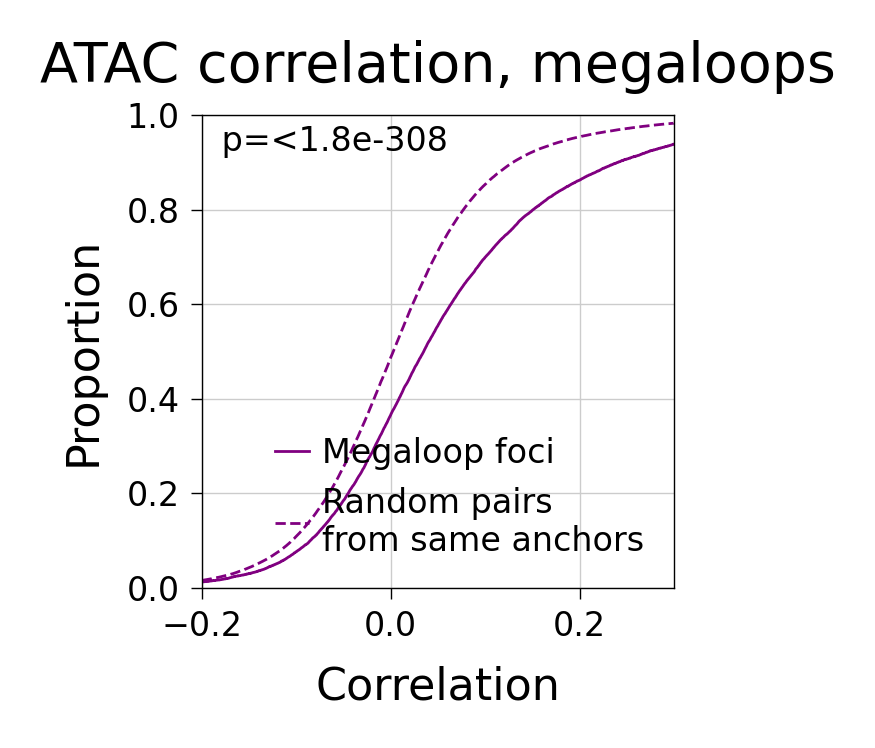

In [709]:
from main_figures_plotting_functions import metaloop_coaccessibility
metaloop_coaccessibility()

I. Coaccessibility plotted elsewhere

#### Figure 7

A. Schematic

B-E. Shown in "ChIP compendium" notebook

In [732]:
!mkdir -p plots/paper/fig7

In [724]:
import os
import bbi
from main_figures_plotting_functions import make_stat5_h3k27ac_dataframes

baseline_chip_genomewide, lfc_chip_genomewide = make_stat5_h3k27ac_dataframes(bbi_path_dict, chromsizes, parsed_chroms)

F.

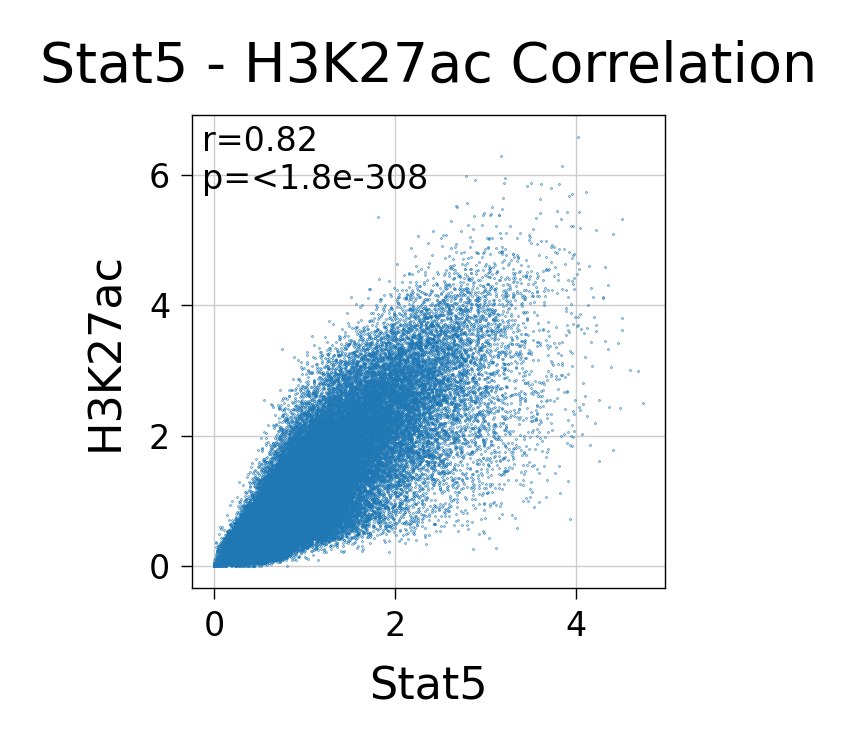

In [727]:
from main_figures_plotting_functions import stat5_h3k27ac_scatterplot

stat5_h3k27ac_scatterplot(baseline_data)

G. 

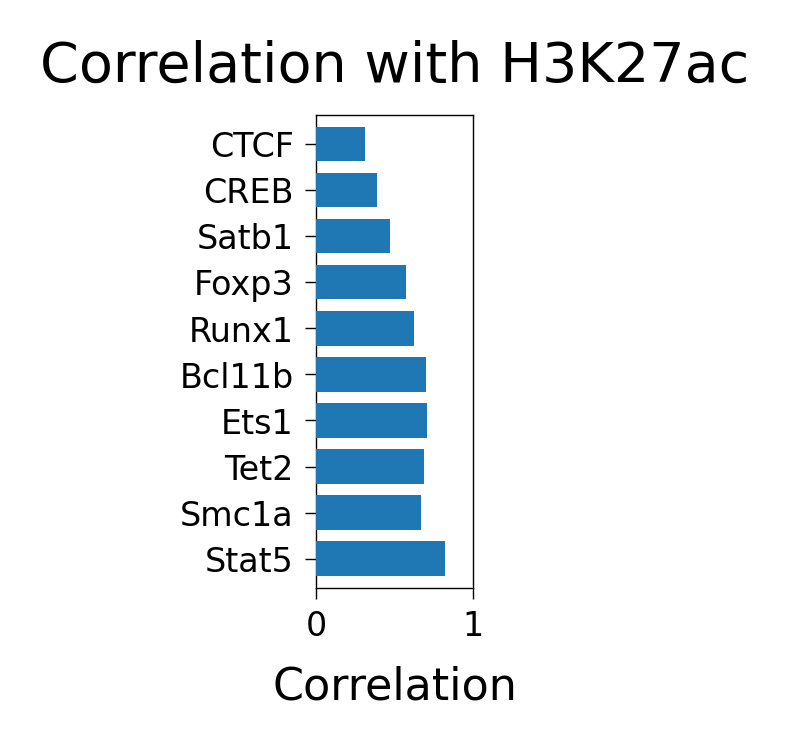

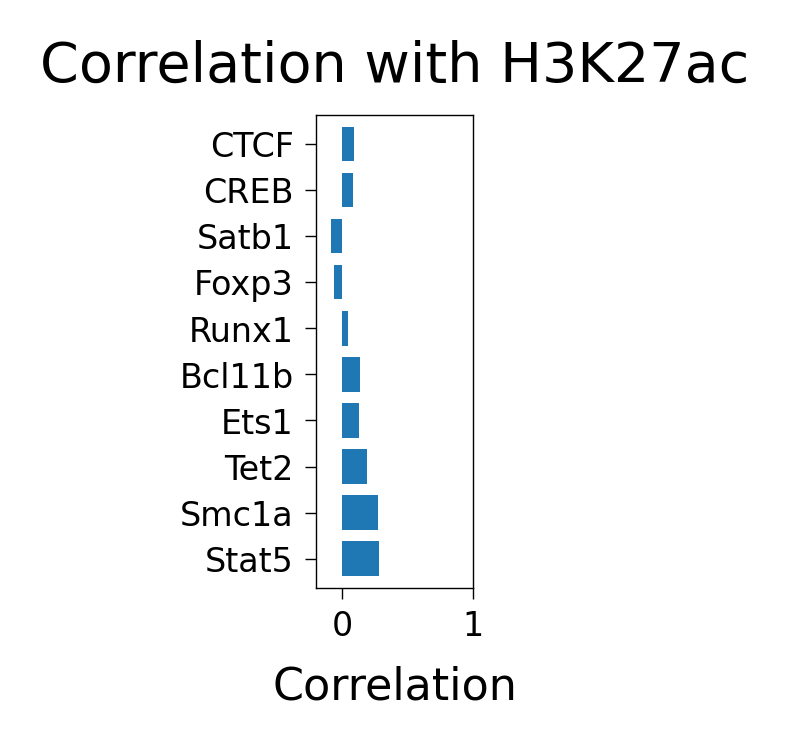

In [726]:
from main_figures_plotting_functions import stat5_h3k27ac_barplots

stat5_h3k27ac_barplots(baseline_chip_genomewide, lfc_chip_genomewide)

H.

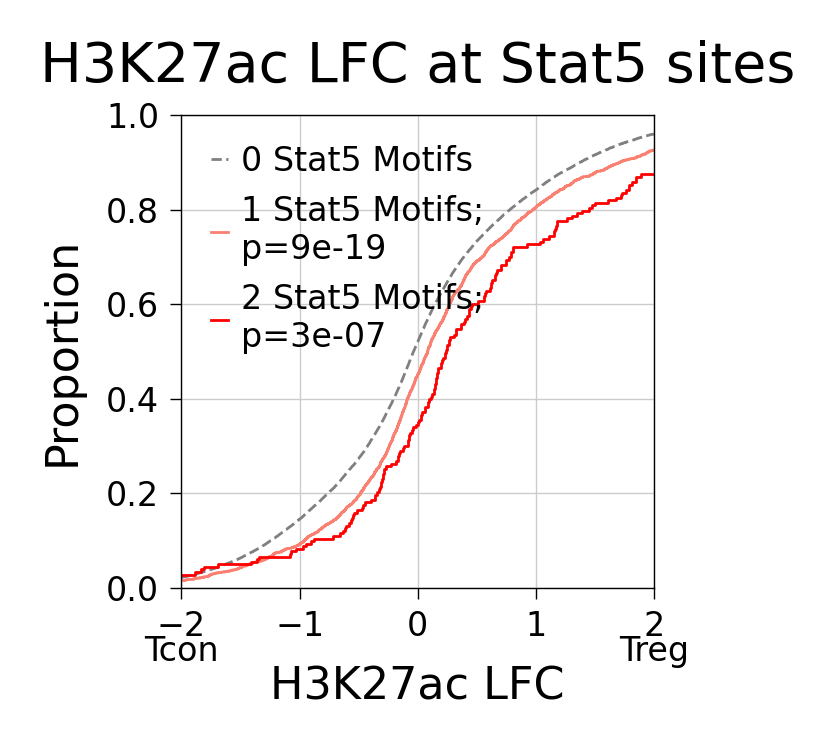

In [716]:
from main_figures_plotting_functions import make_h3k27ac_stat5_motif_plot

make_h3k27ac_stat5_motif_plot()

I.

/Genomics/pritykinlab/gabe/jupys/tregs/./code/main_figures_plotting_functions.py:1617: RuntimeWarning: divide by zero encountered in log2
  'Stat5' : np.log2(np.ravel(bw_val_dict_all_250kb['Treg Stat5'] / bw_val_dict_all_250kb['Tcon Stat5'])),
/Genomics/pritykinlab/gabe/jupys/tregs/./code/main_figures_plotting_functions.py:1619: RuntimeWarning: divide by zero encountered in log2
  'Ets1' : np.log2(np.ravel(bw_val_dict_all_250kb['Treg Ets1'] / bw_val_dict_all_250kb['Tconv Ets1'])),
/Genomics/pritykinlab/gabe/jupys/tregs/./code/main_figures_plotting_functions.py:1625: RuntimeWarning: divide by zero encountered in log2
  'H3K27me3' : np.log2(np.ravel(bw_val_dict_all_250kb['Treg H3K27me3'] / bw_val_dict_all_250kb['Tcon H3K27me3'])),


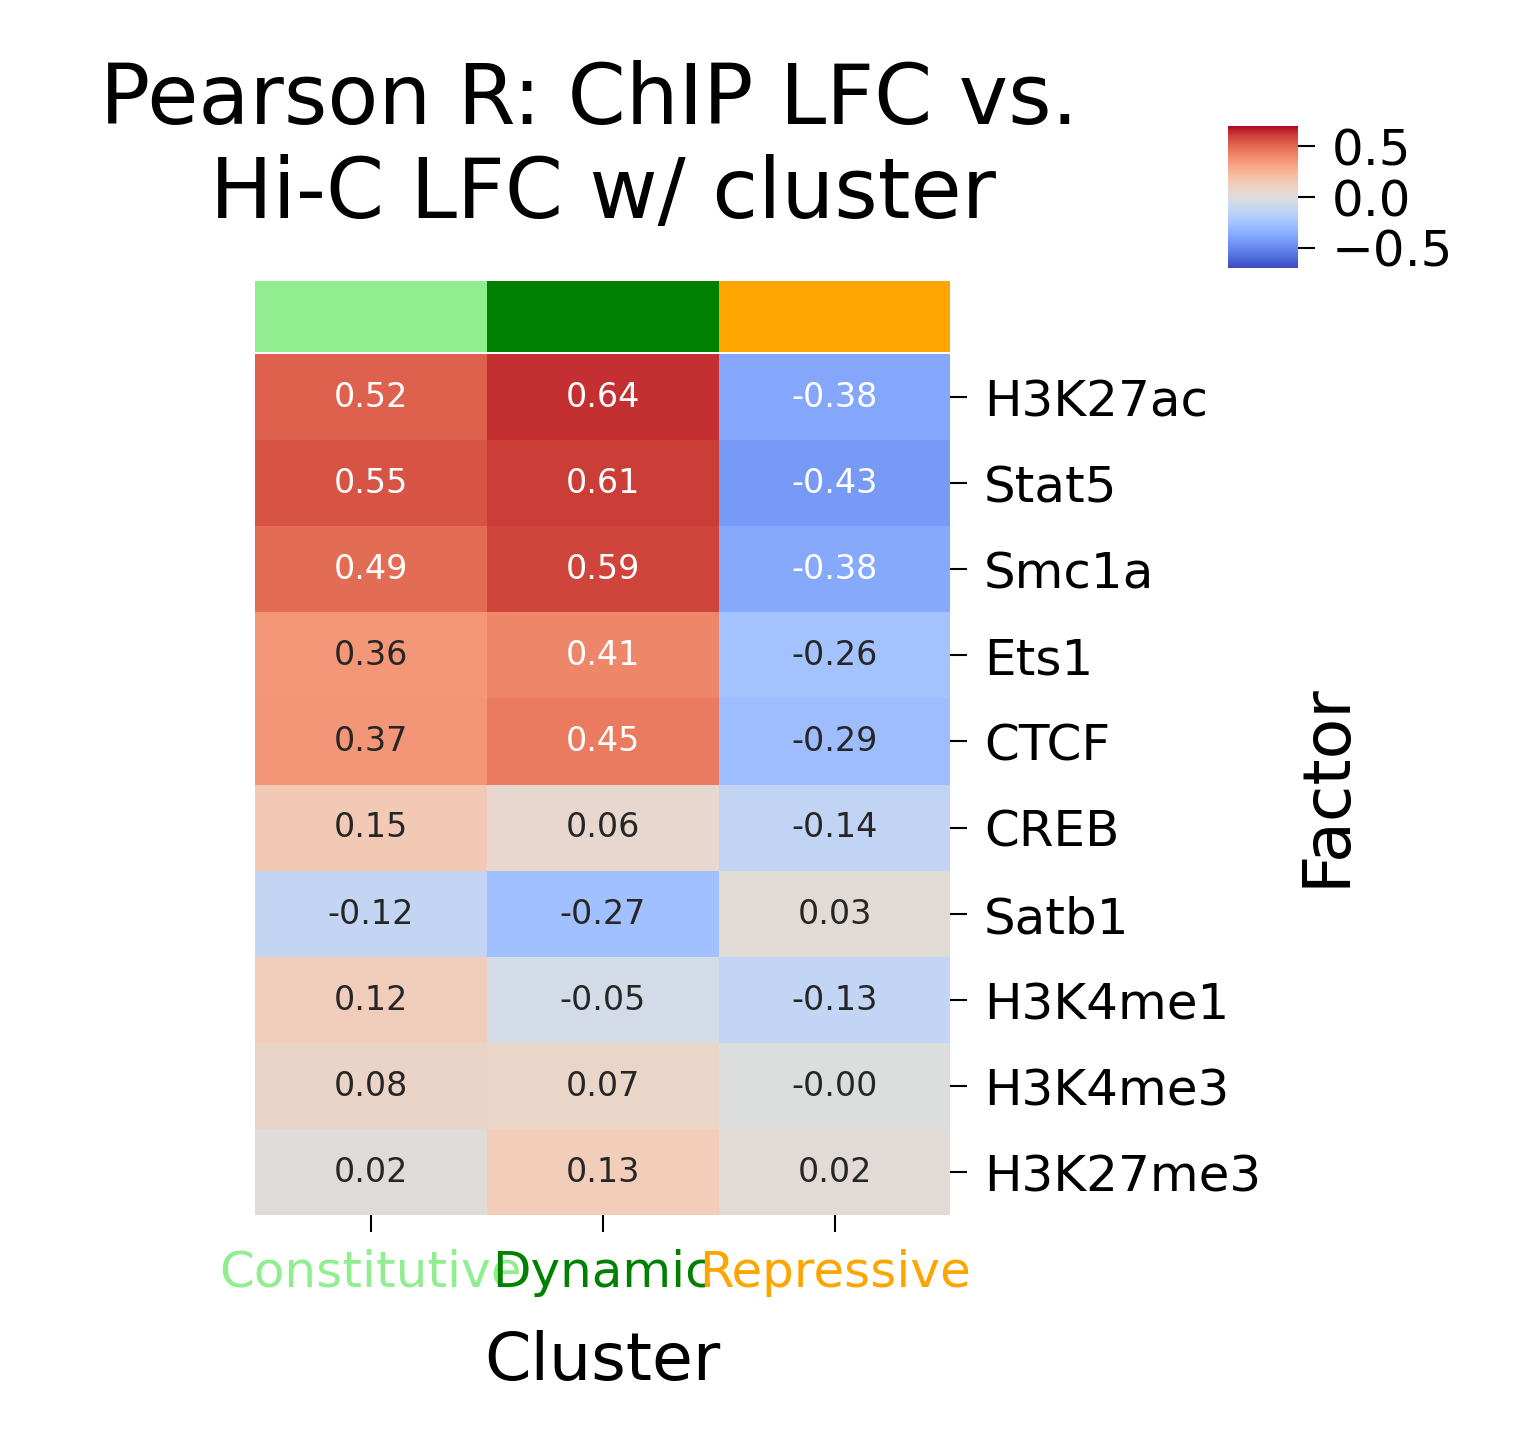

In [733]:
from main_figures_plotting_functions import chip_hub_correlation_plots

chip_hub_correlation_plots(self, bw_val_df_all_250kb, stat_df, columns_to_names, row_colors_dict)